# **Tree Based Regression in ML Part 2**

For detailed presentation [visit here](https://github.com/mhuzaifadev/ml_zero_to_hero/raw/master/Tree%20based%20Regression.pdf)


## **Random Forest Regression**

<img src="https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png">

## **Why Random Forest?**

*   Use of multiple trees reduce risk of overfitting
*   Runs effeciently on larger database, and produces highly accurate predictions

## **Applications of Random Forest**


## **Get Started with Random Forest Regression**

In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Importing the Dataset**

Reading ().csv file

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
print(dataset.head())
X = dataset["Level"].values
y = dataset["Salary"].values

X= np.array(X).reshape(-1,1)
y= np.array(y).reshape(-1,1)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


## **Splitting the Dataset into the Training Set and Test Set**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

## **Training the Model**

In [5]:
modelRF = RandomForestRegressor(random_state = 0)
modelRF.fit(X,y)

/var/folders/dq/452wvgp96nv2qcc3dn0dv8240000gn/T/ipykernel_1269/3207595789.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X,y)


RandomForestRegressor(random_state=0)

In [6]:
dataset.Level
# dataset.Salary

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

## **Tree Visualization**

In [7]:
len(modelRF.estimators_)

100

/var/folders/dq/452wvgp96nv2qcc3dn0dv8240000gn/T/ipykernel_1269/577535665.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,10))


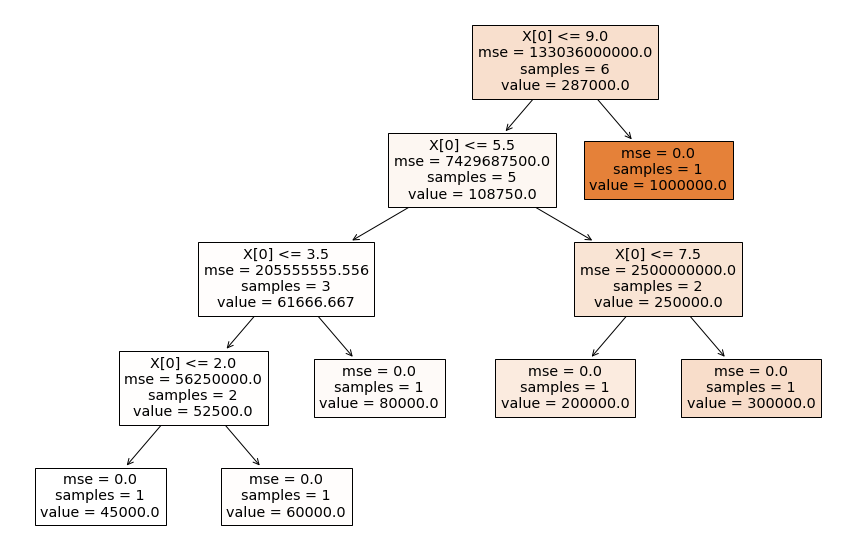

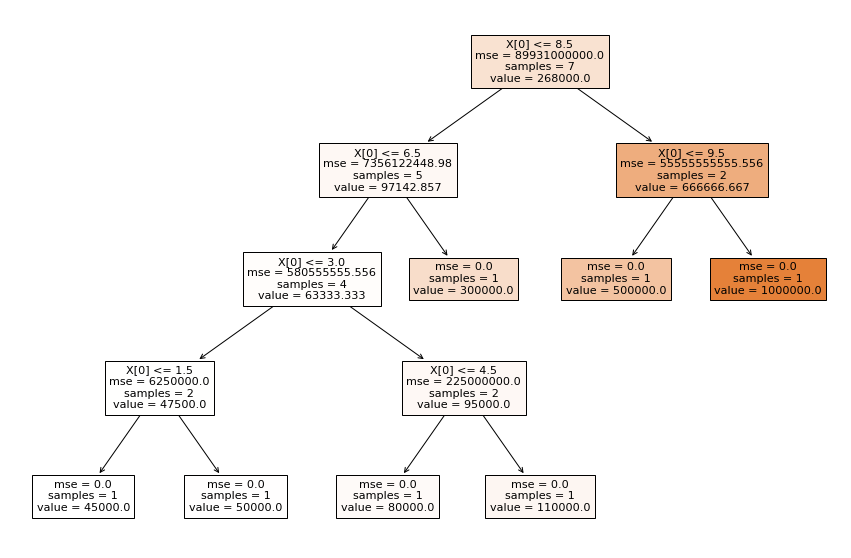

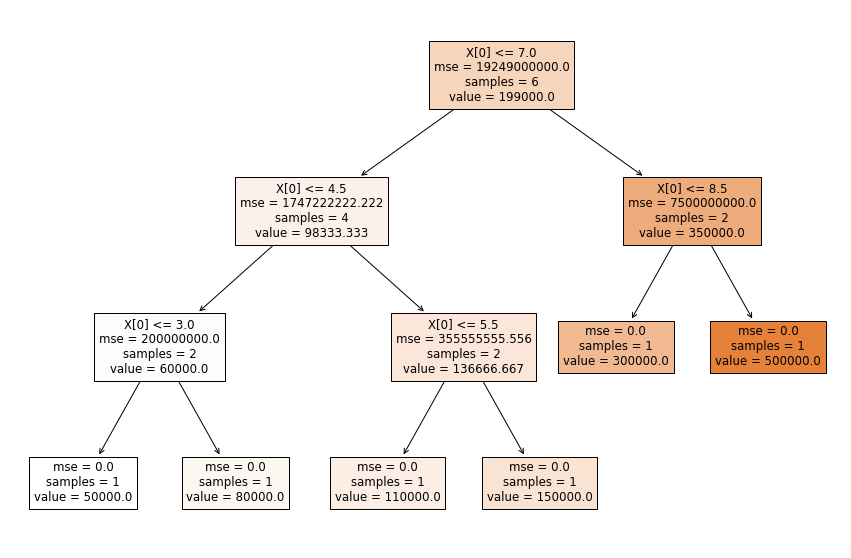

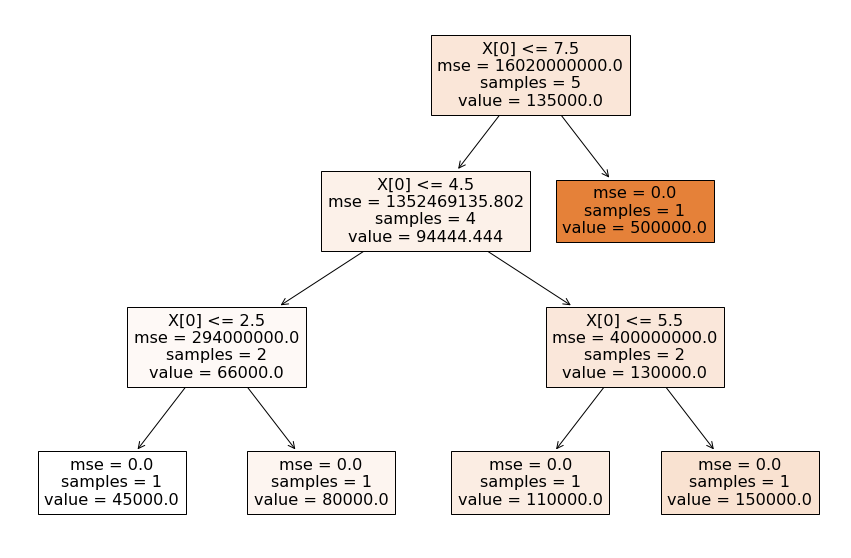

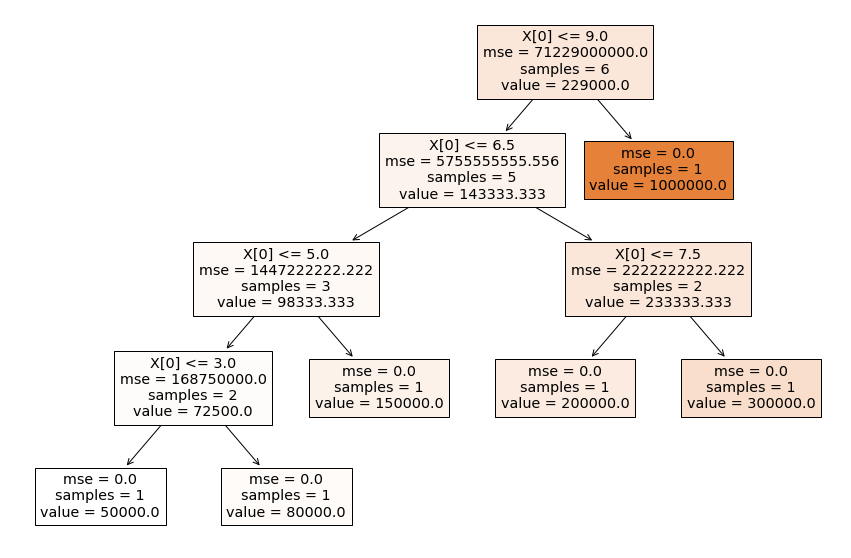

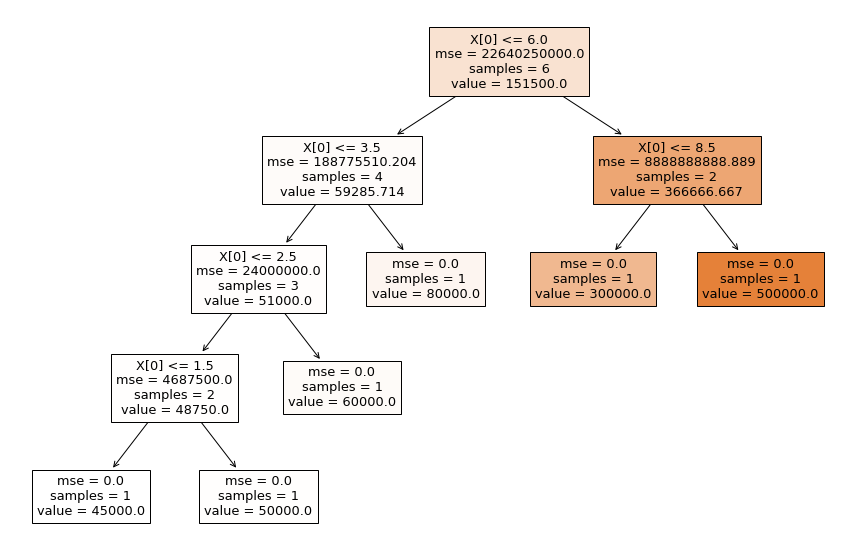

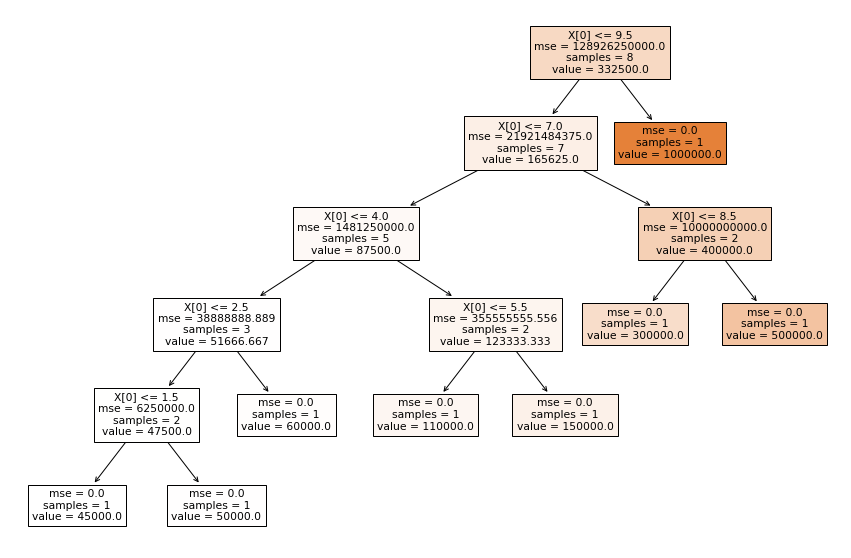

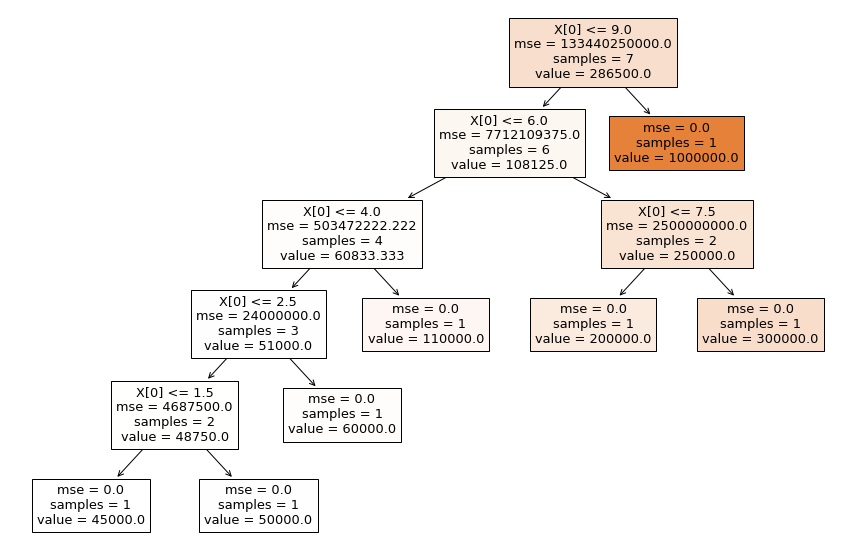

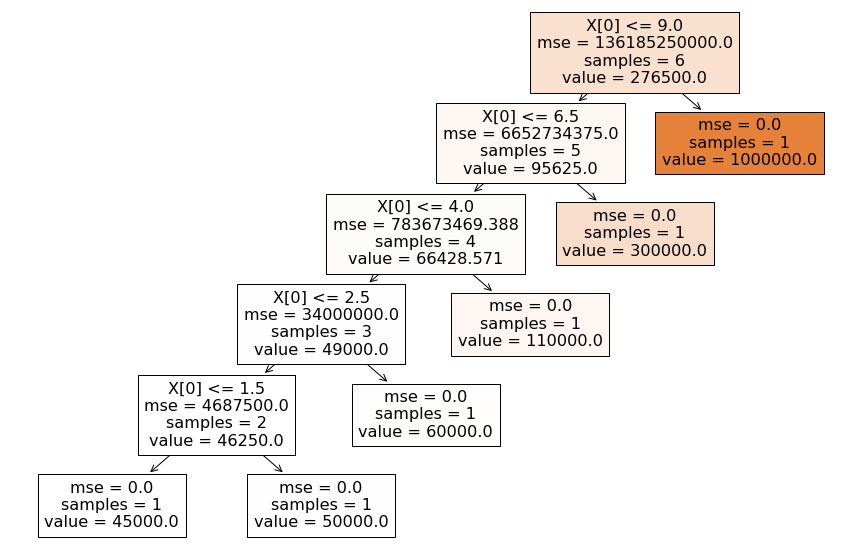

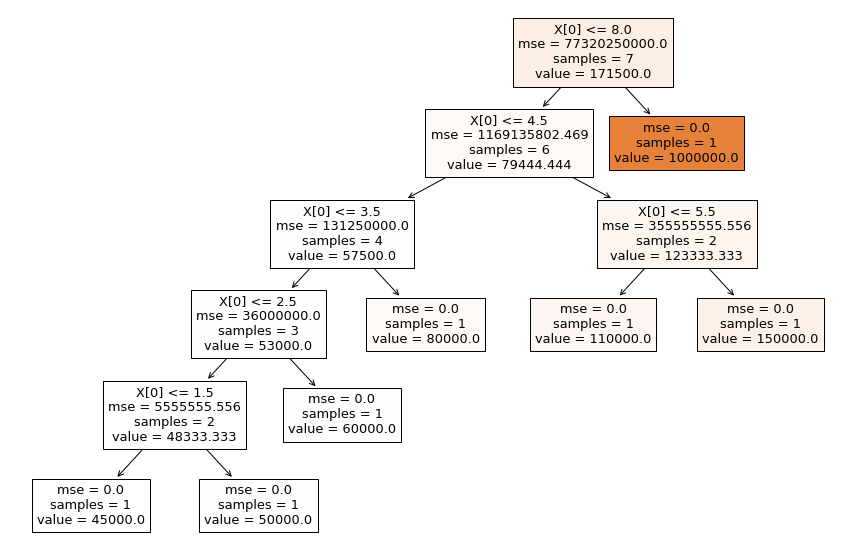

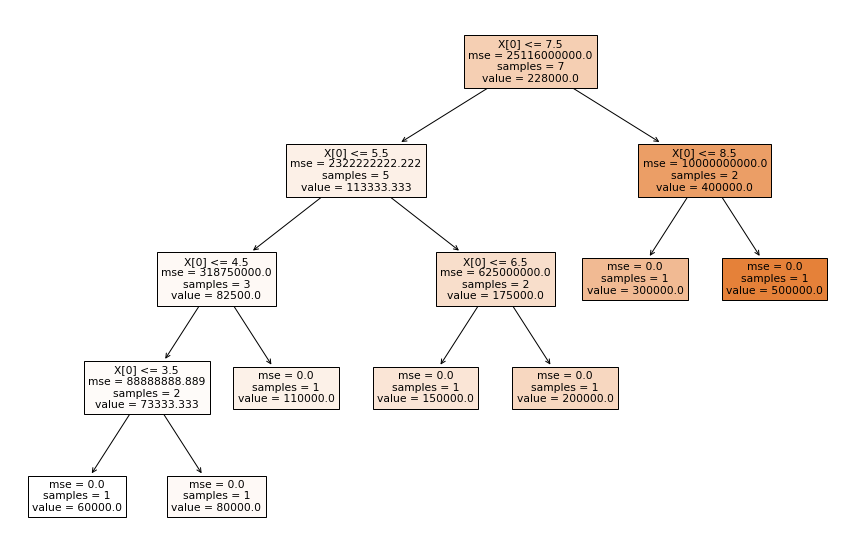

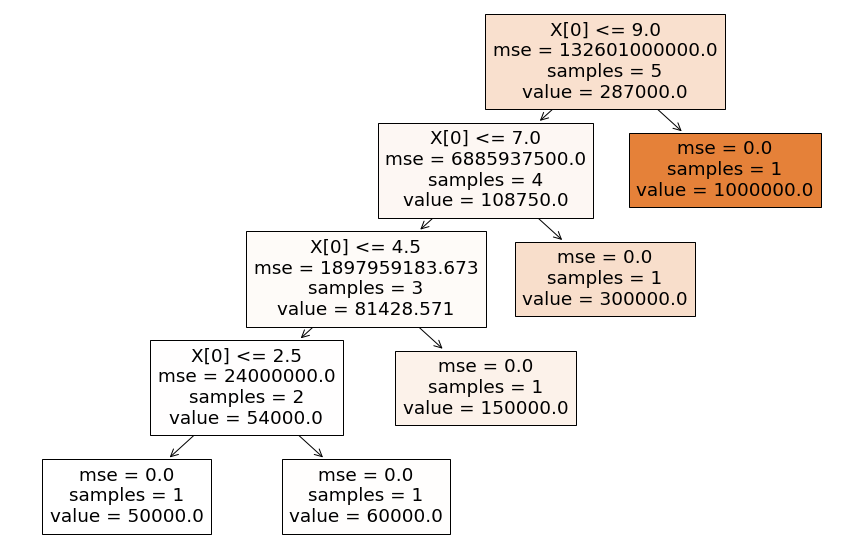

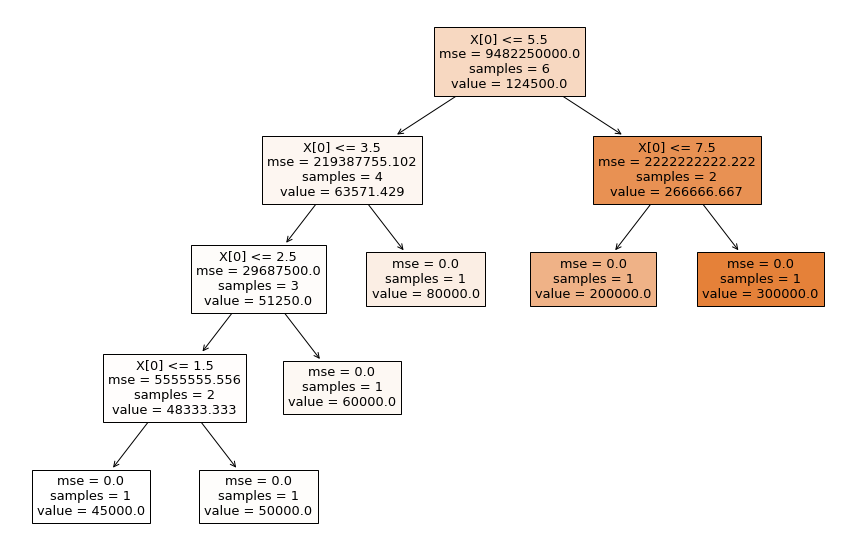

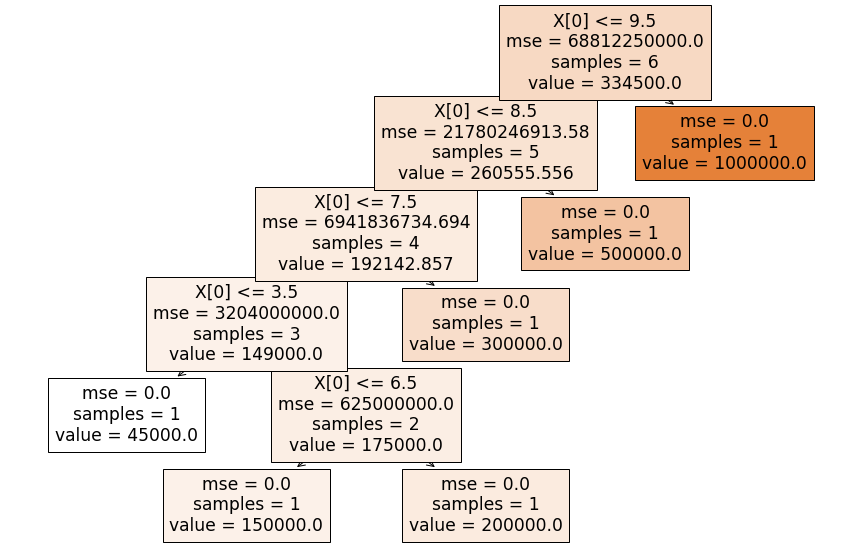

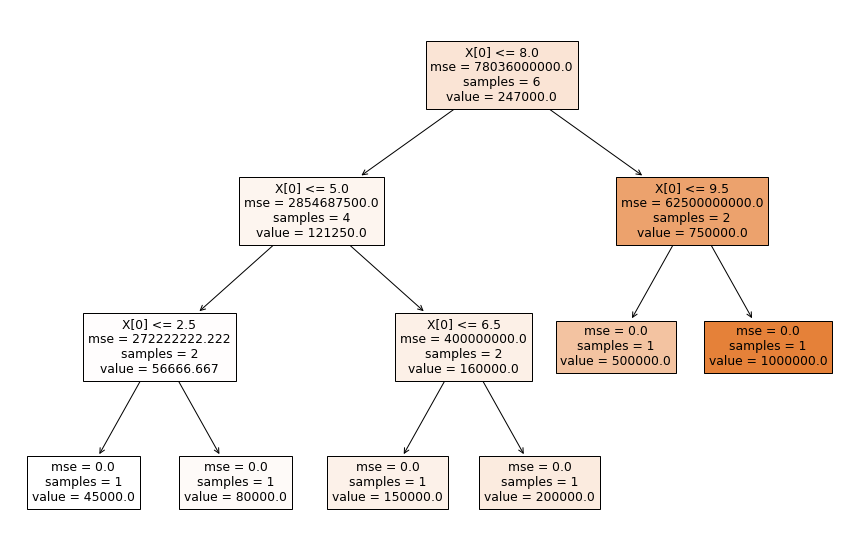

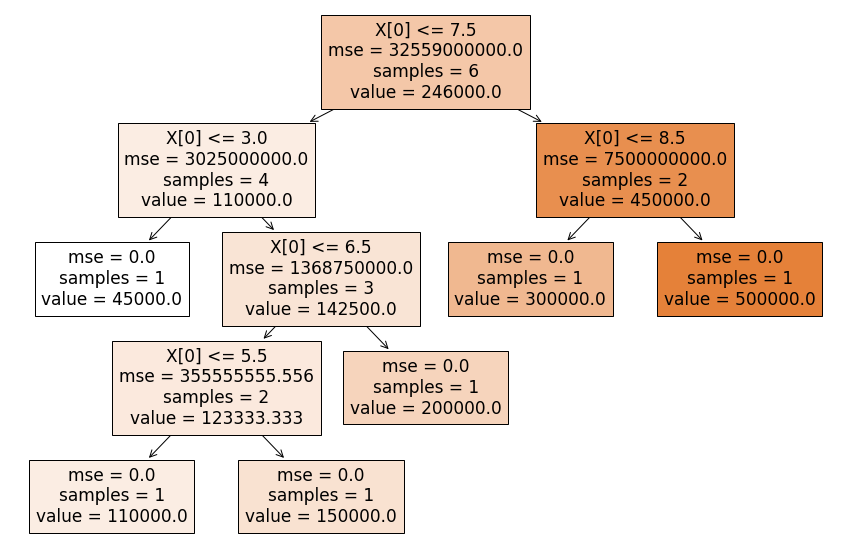

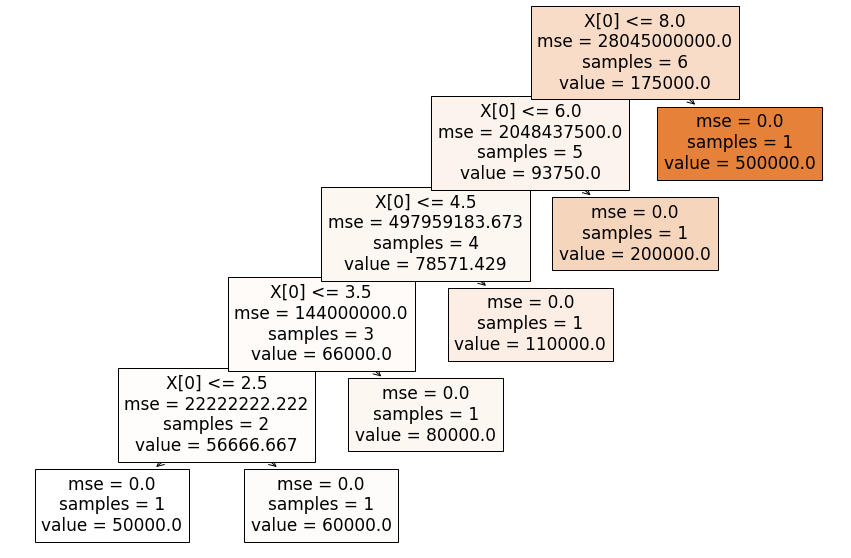

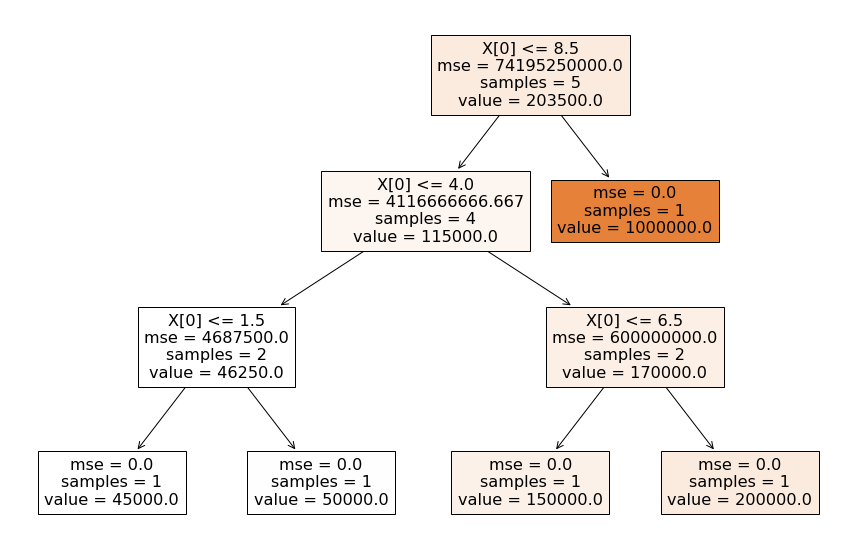

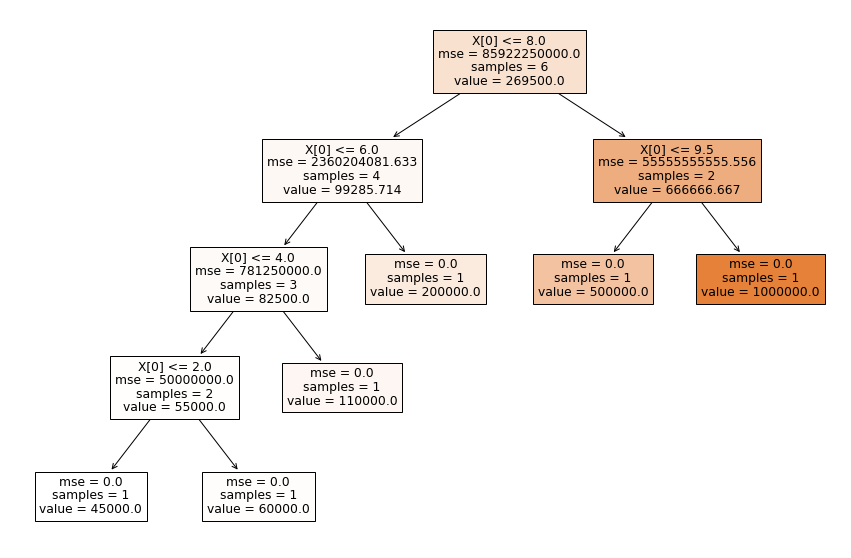

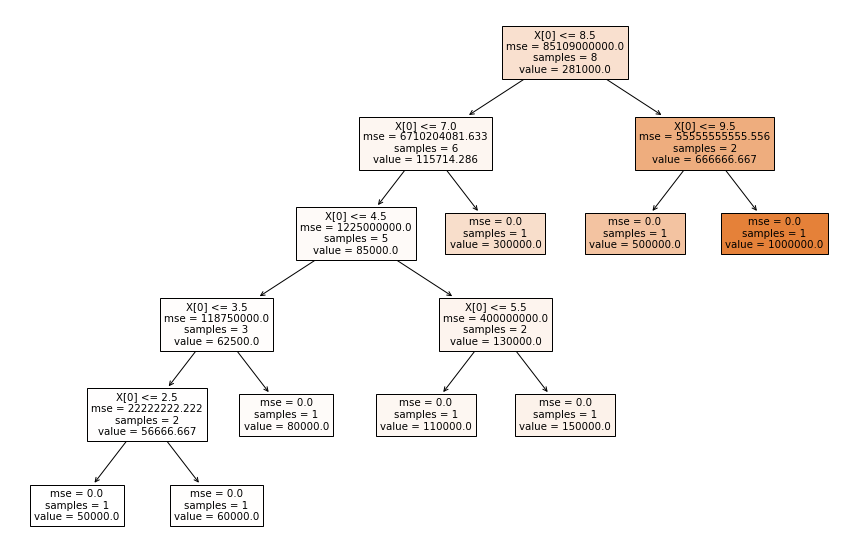

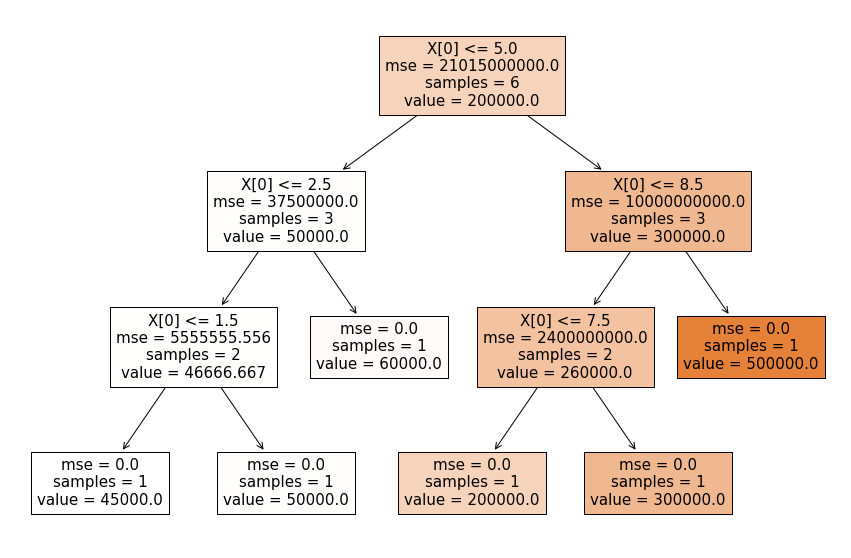

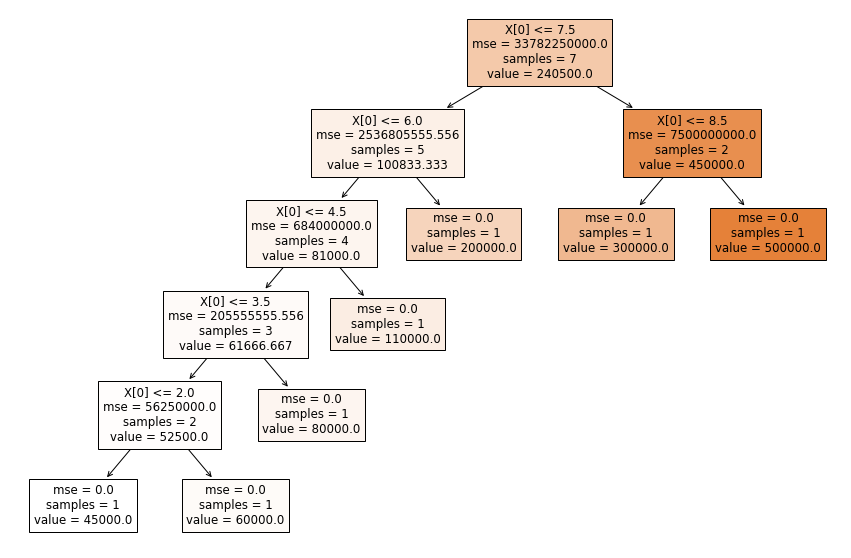

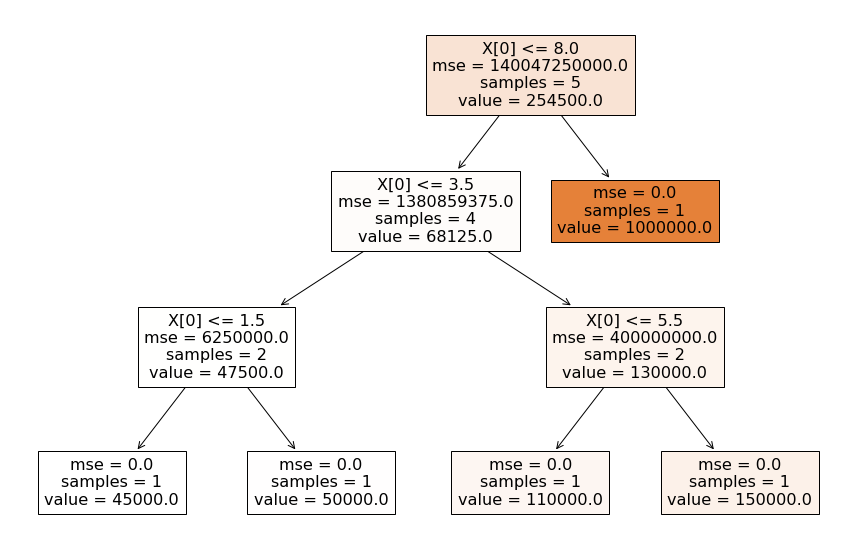

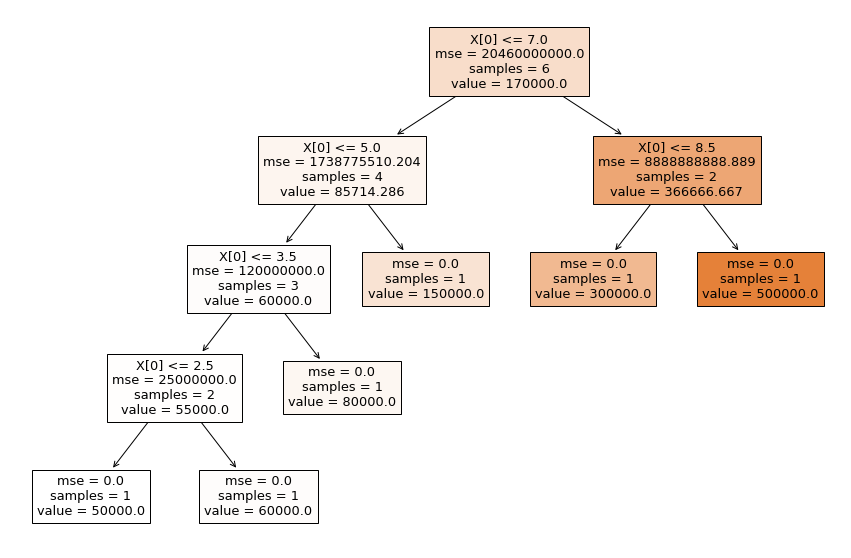

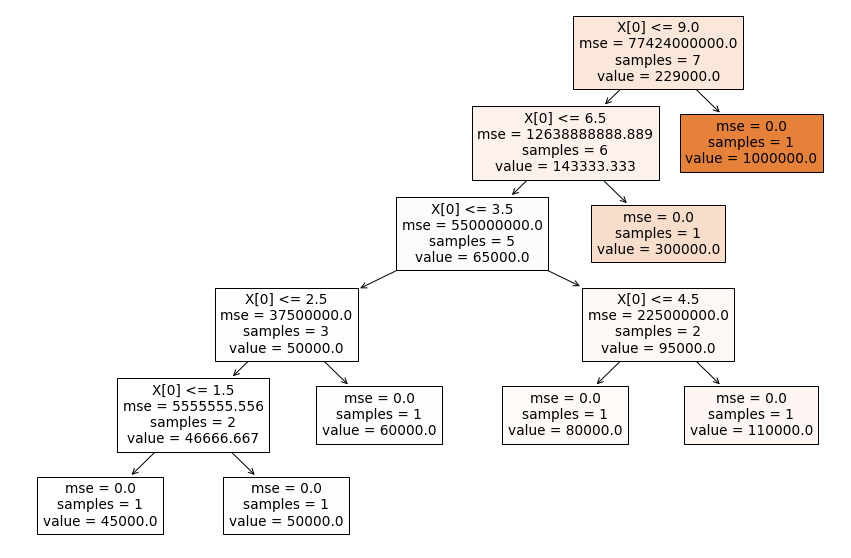

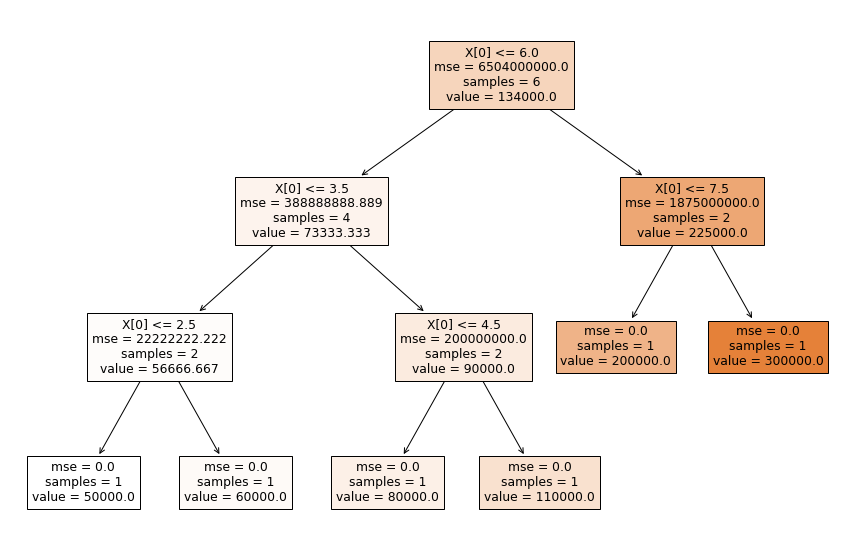

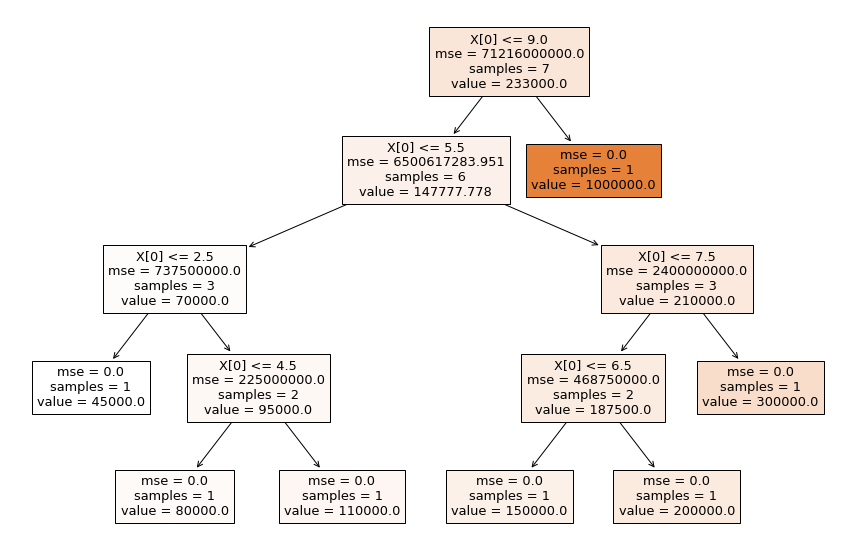

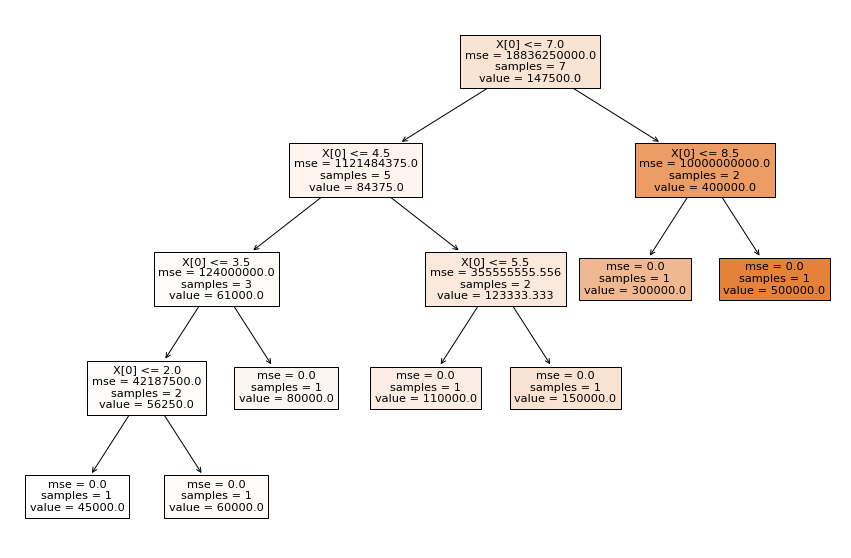

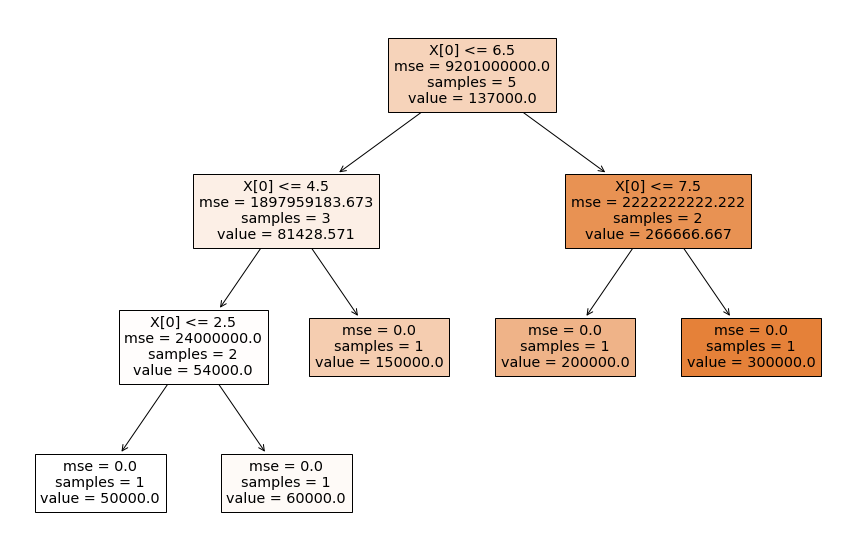

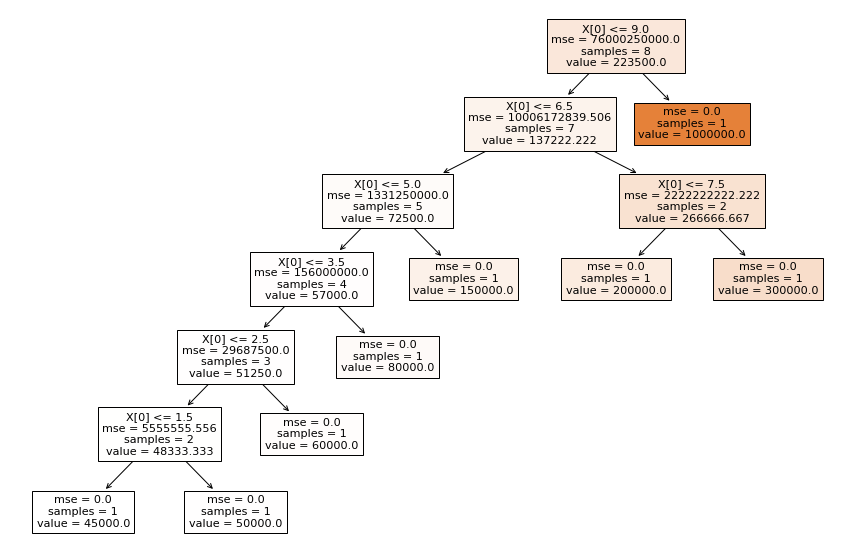

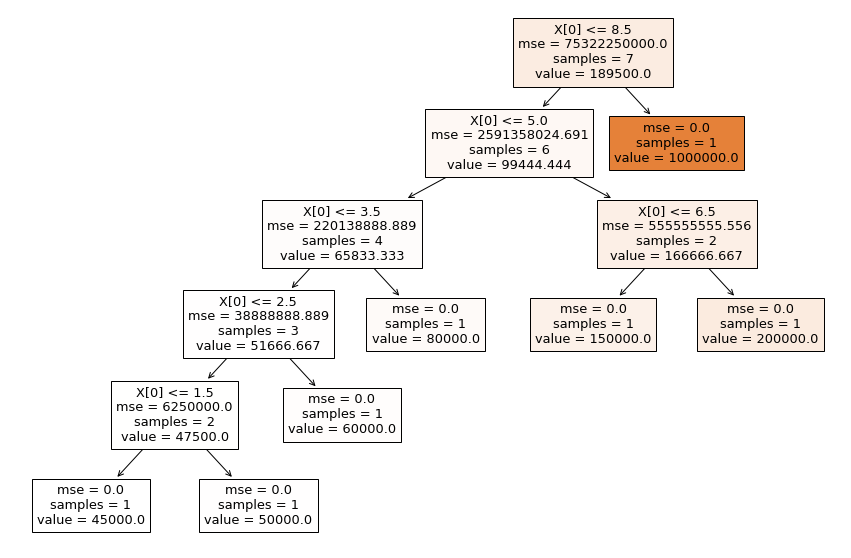

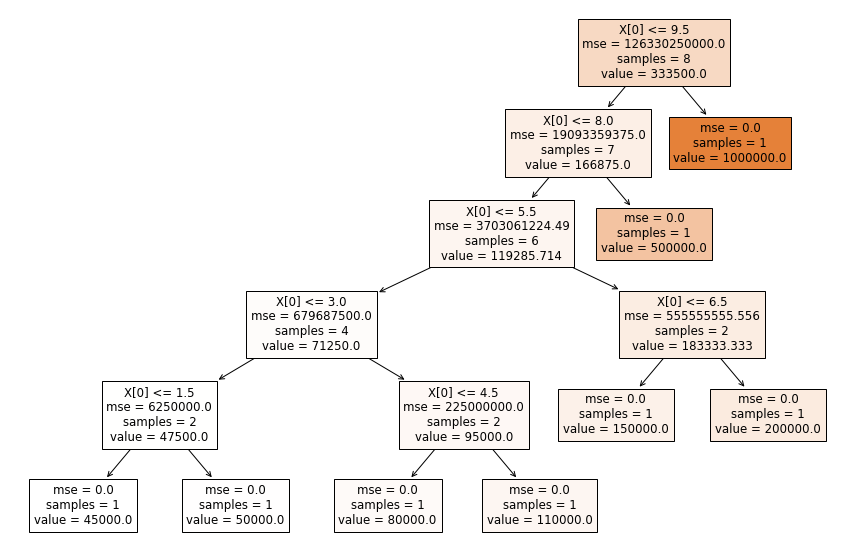

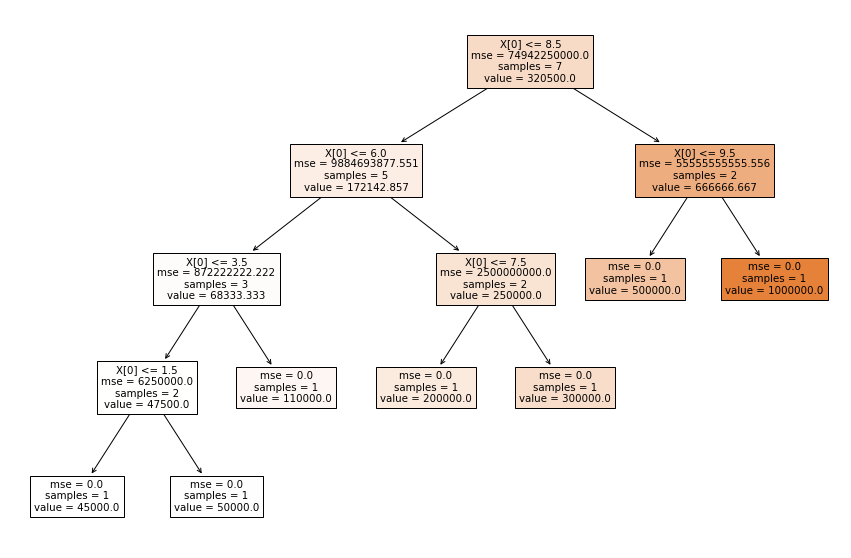

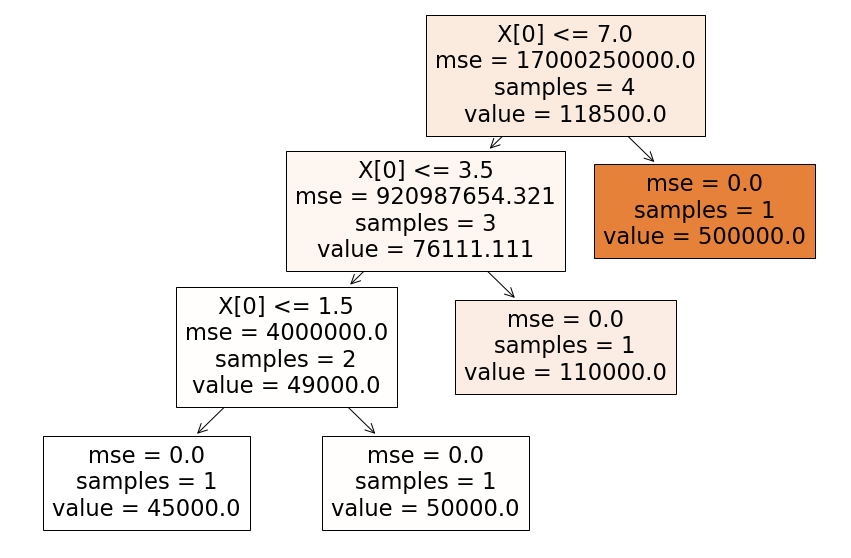

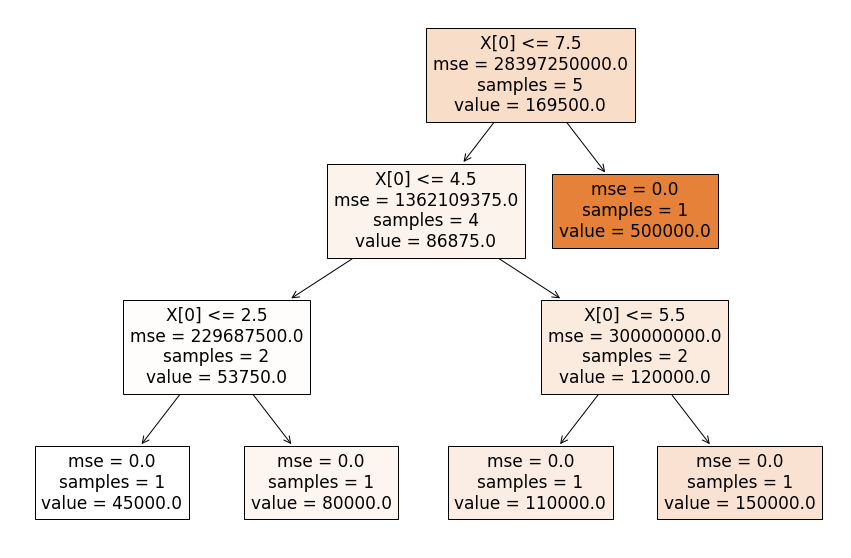

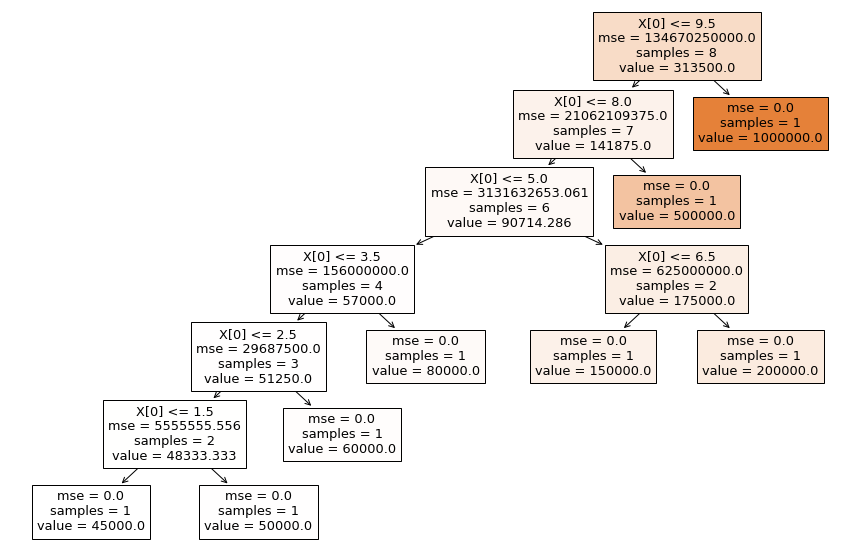

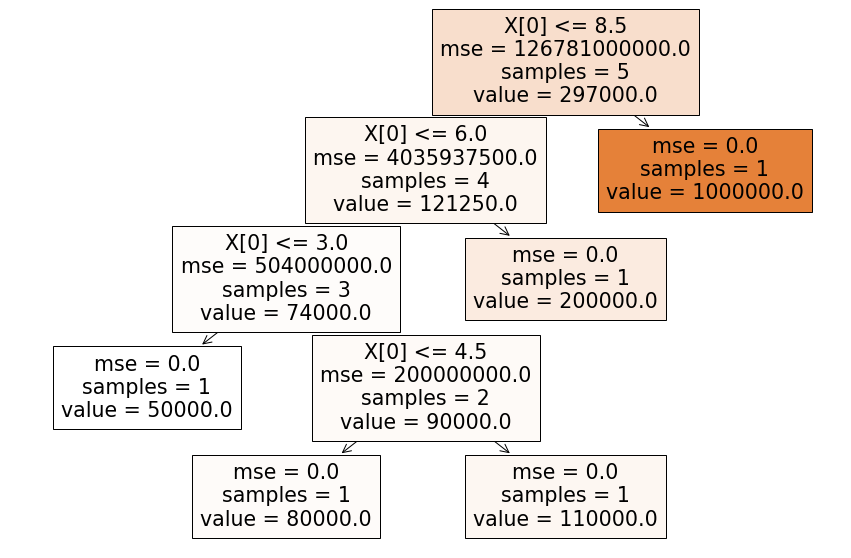

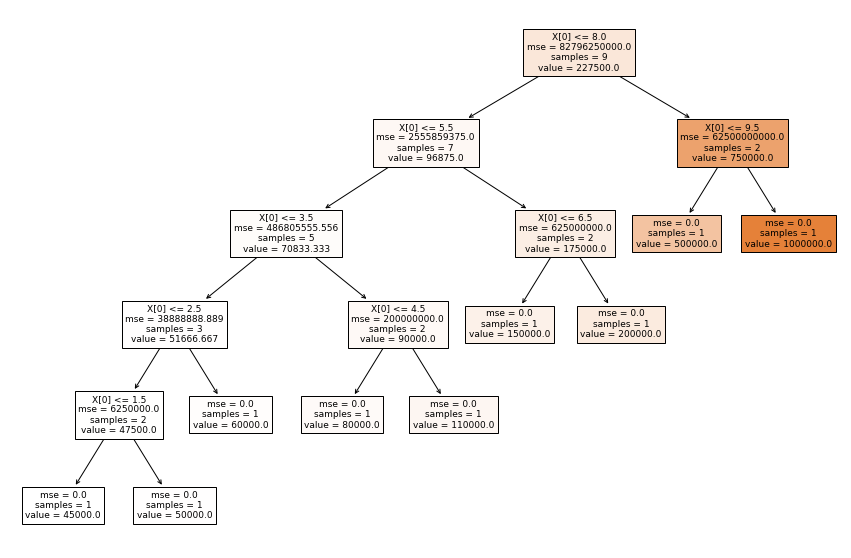

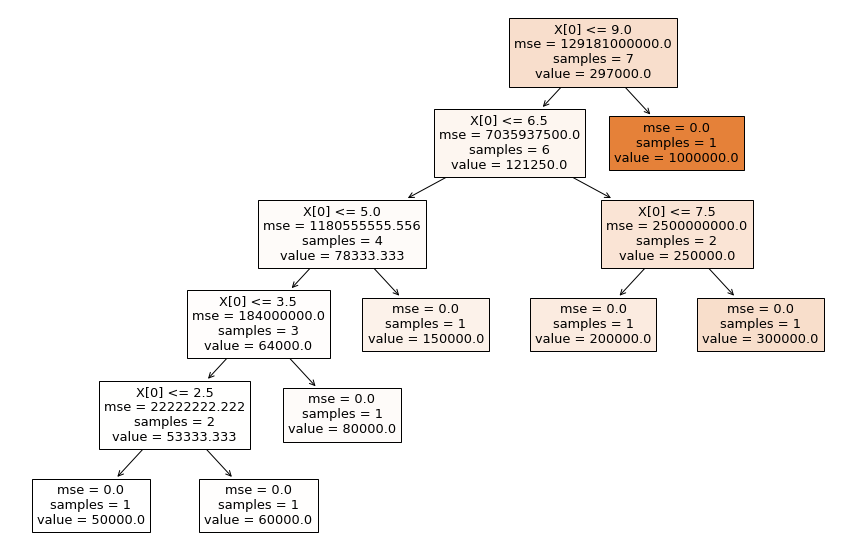

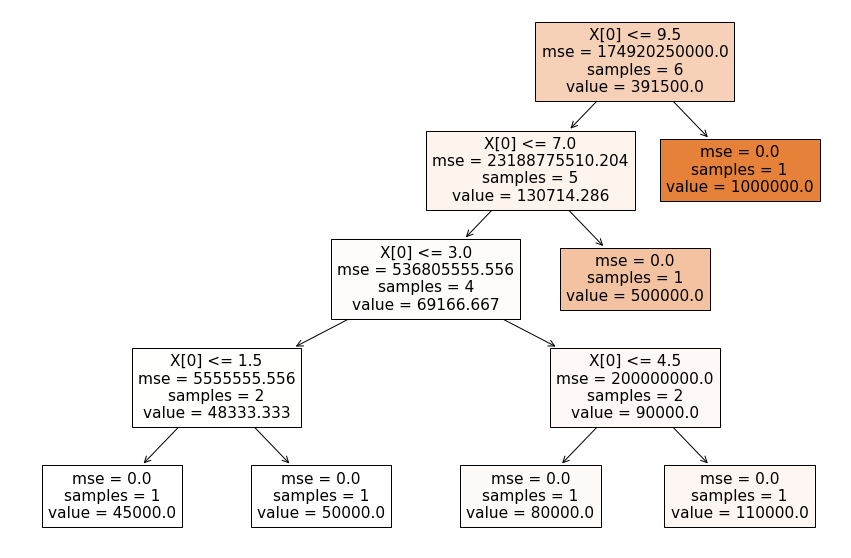

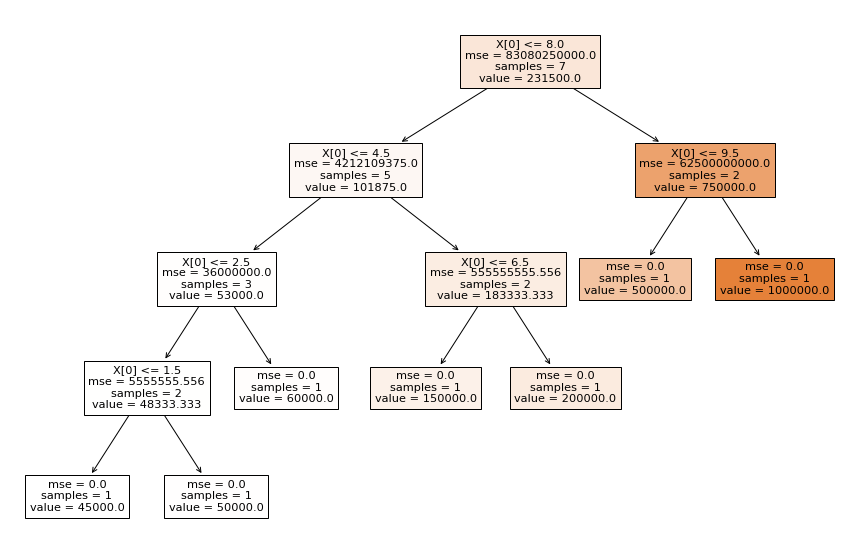

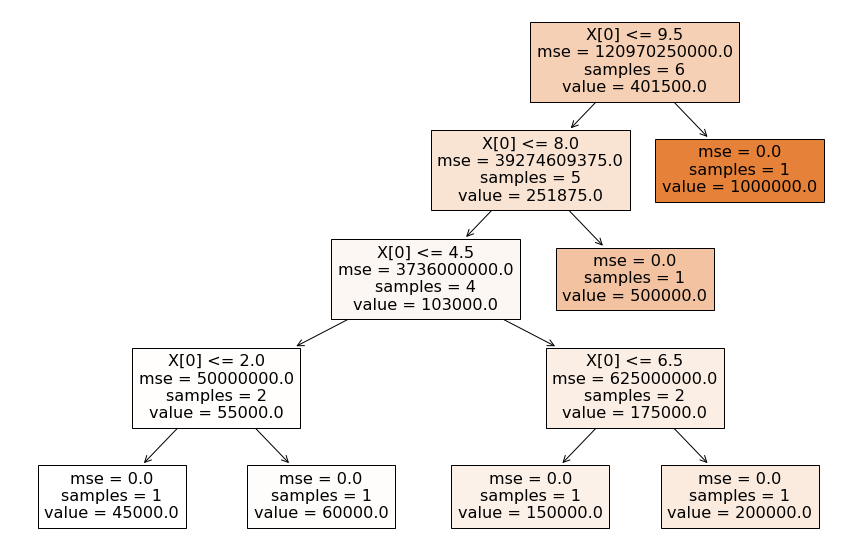

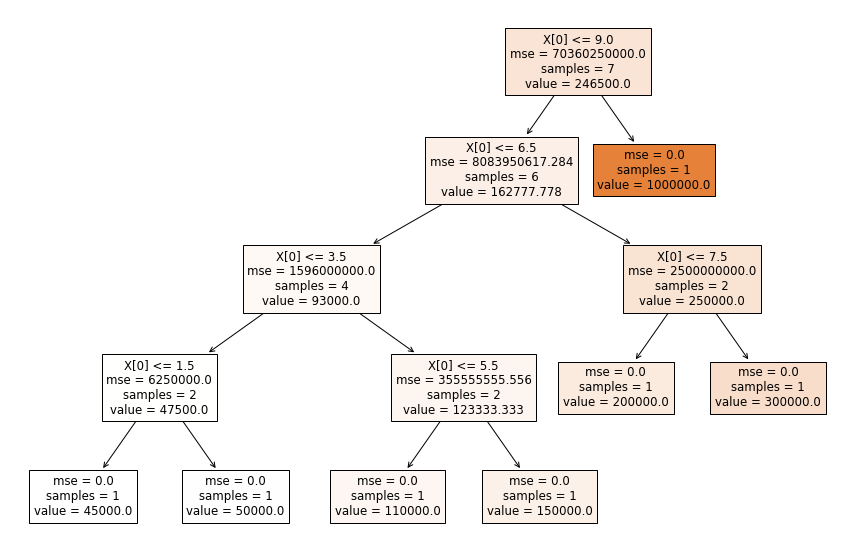

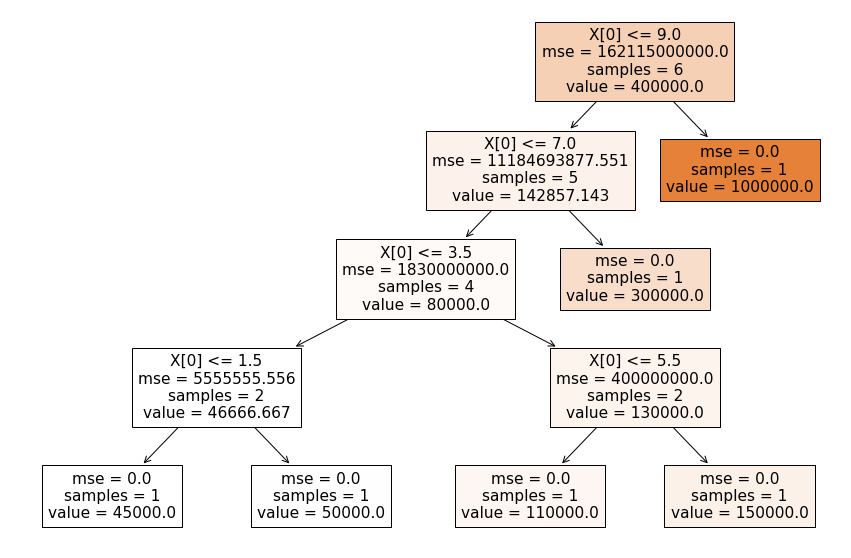

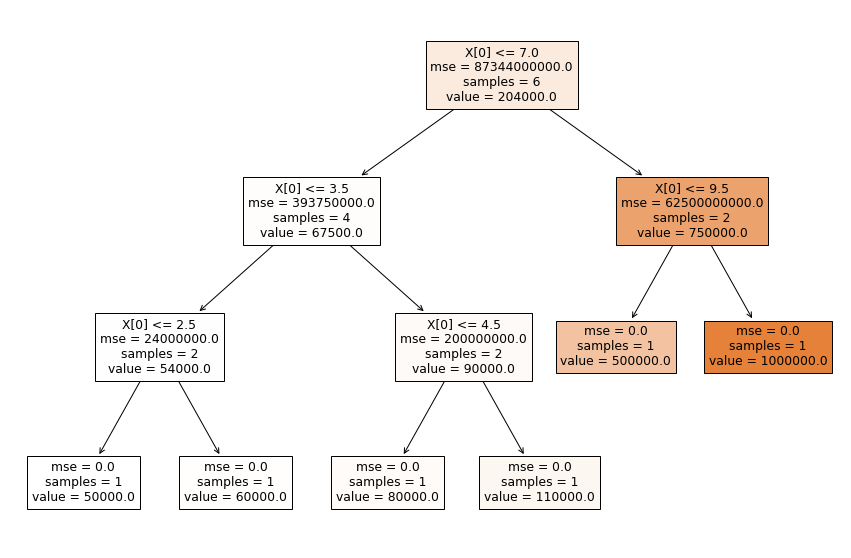

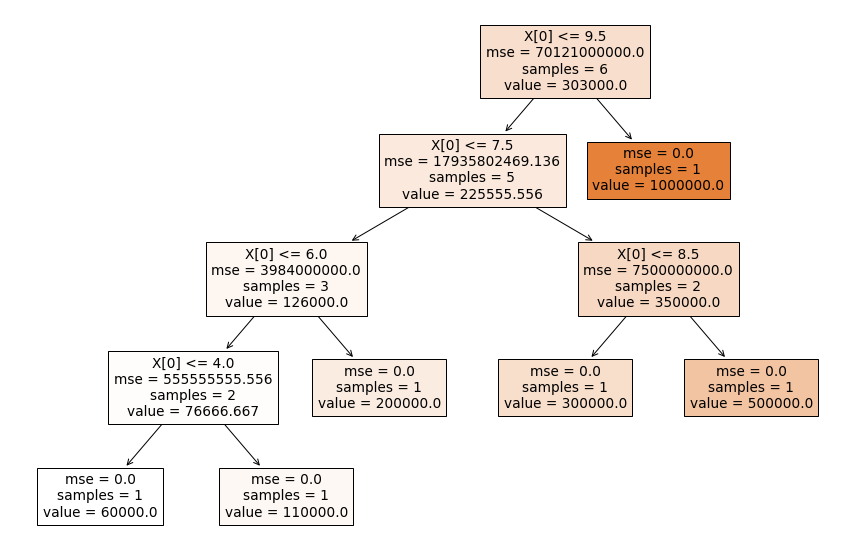

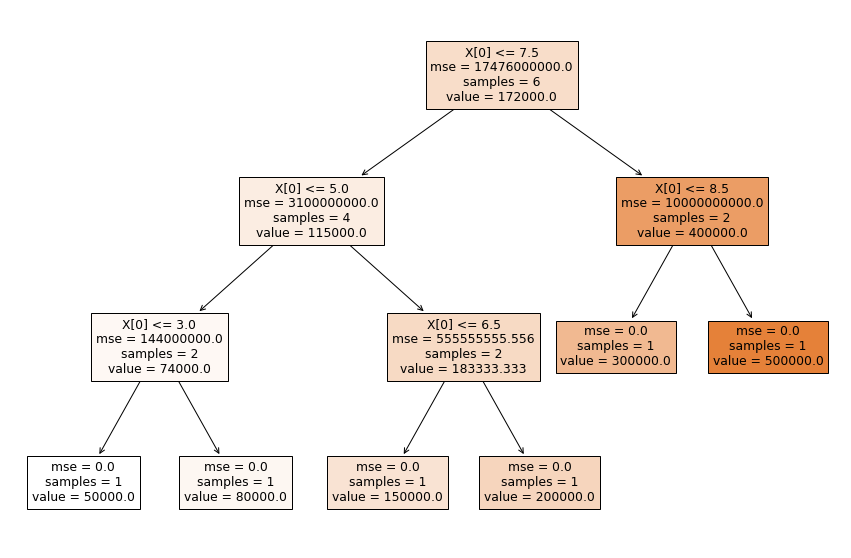

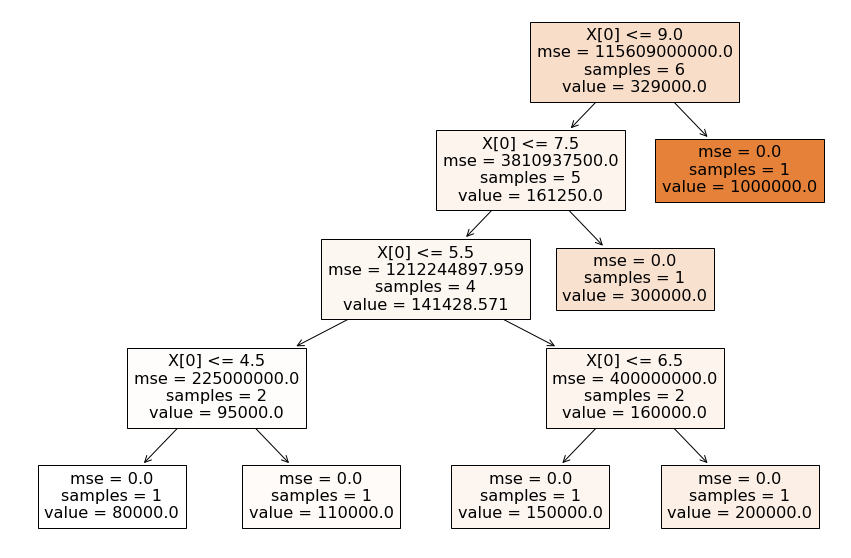

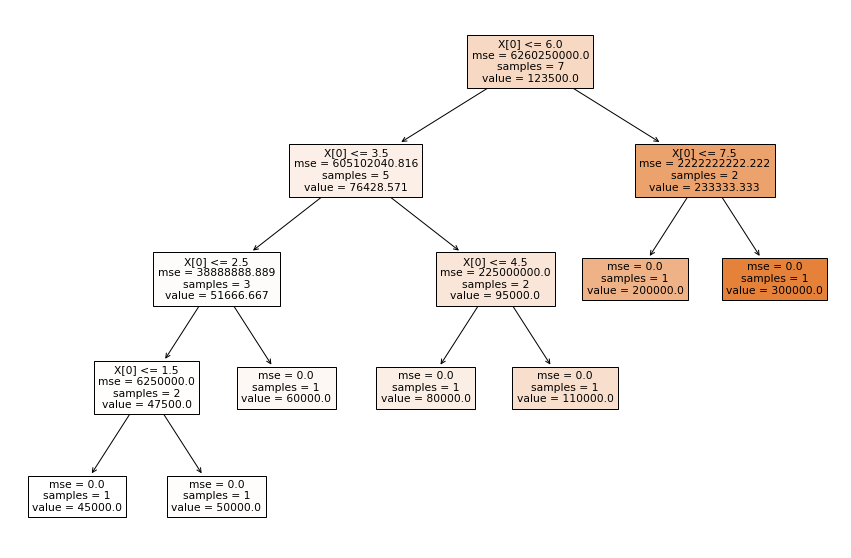

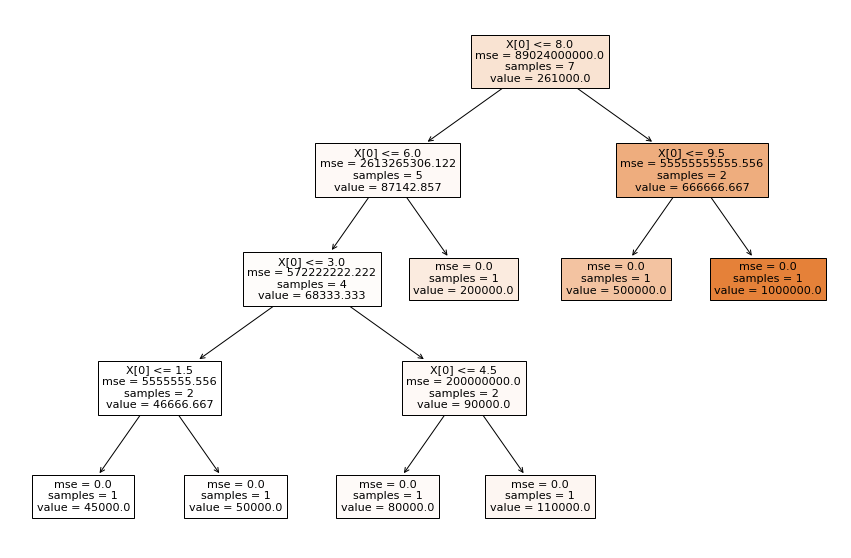

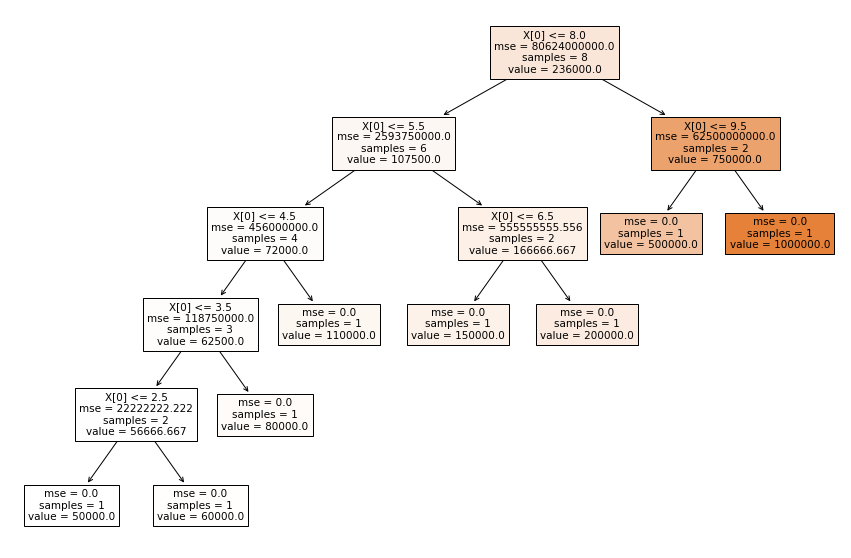

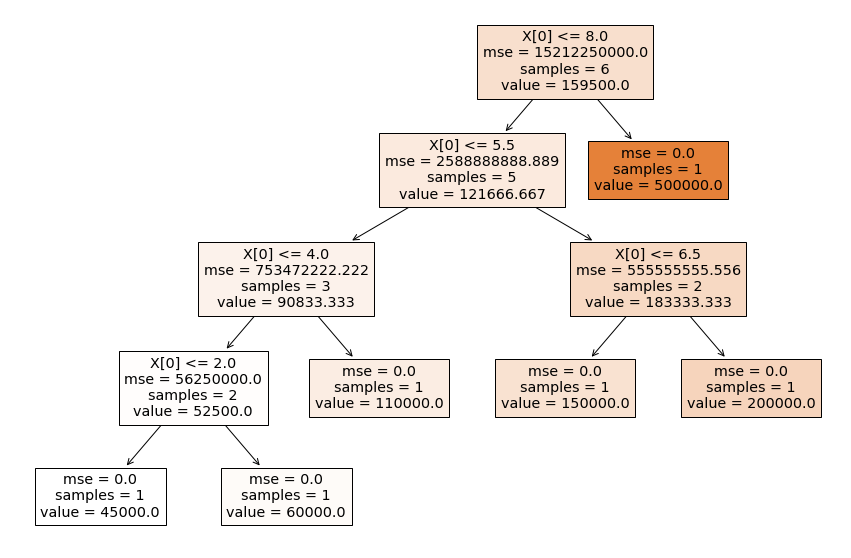

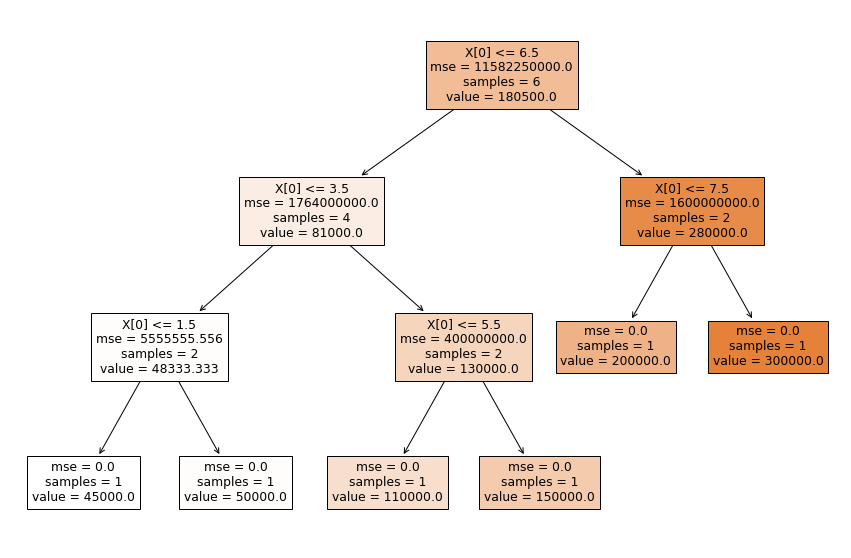

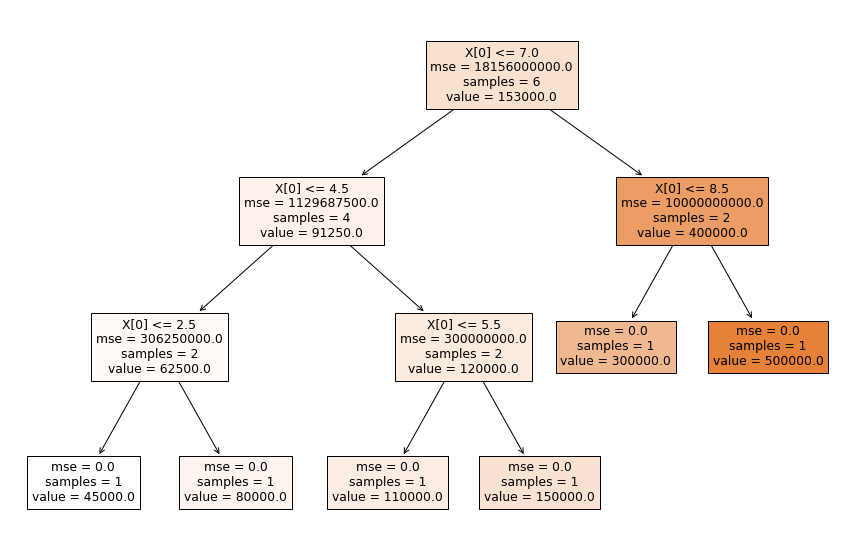

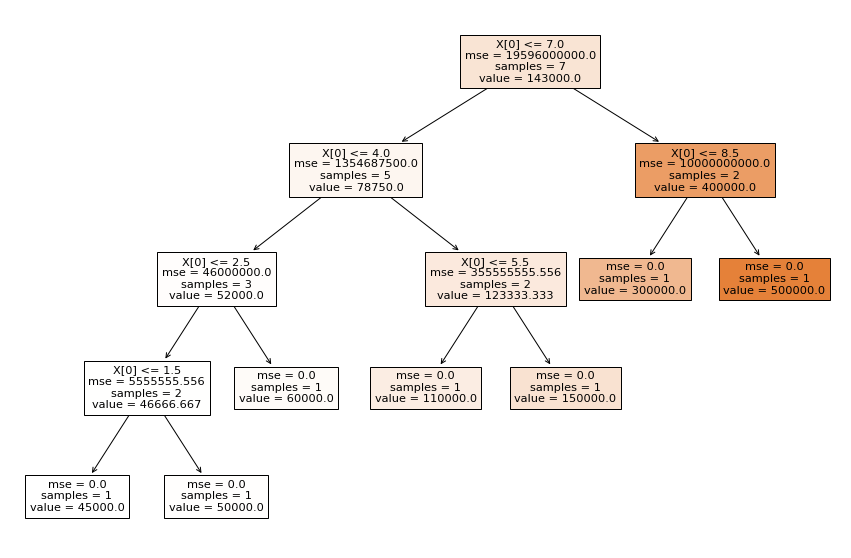

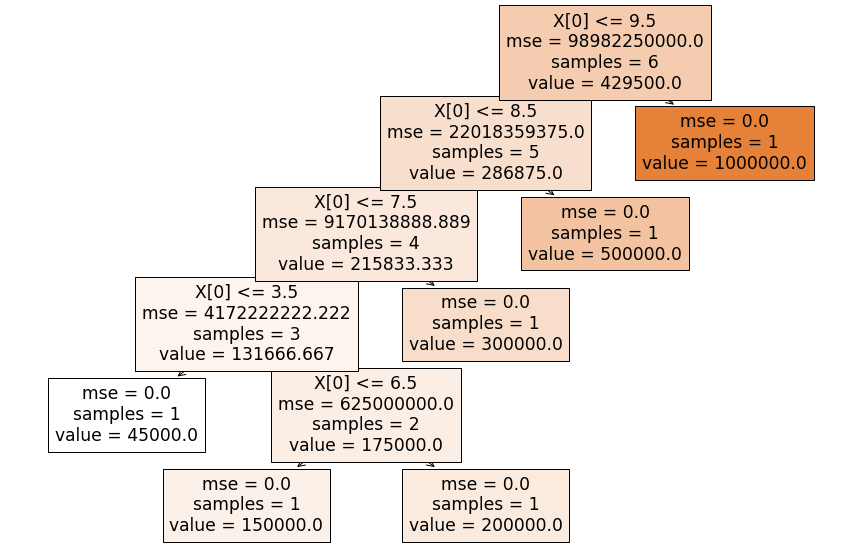

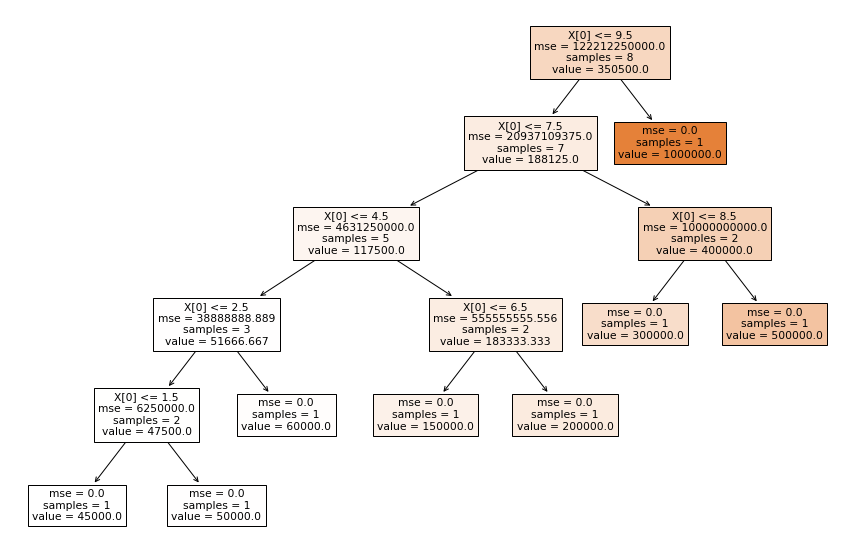

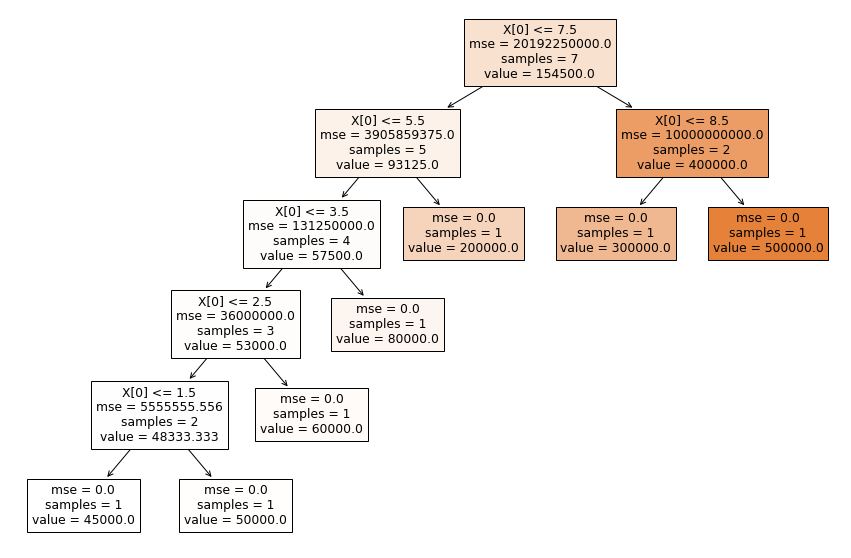

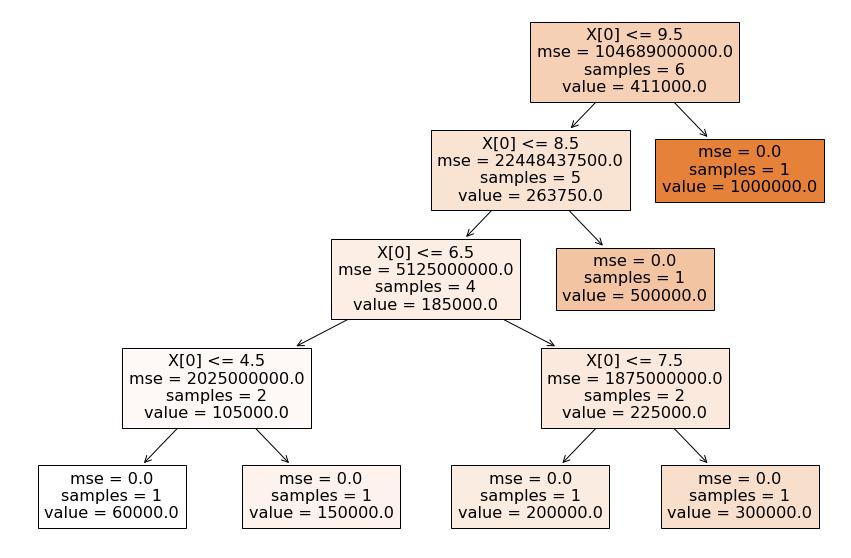

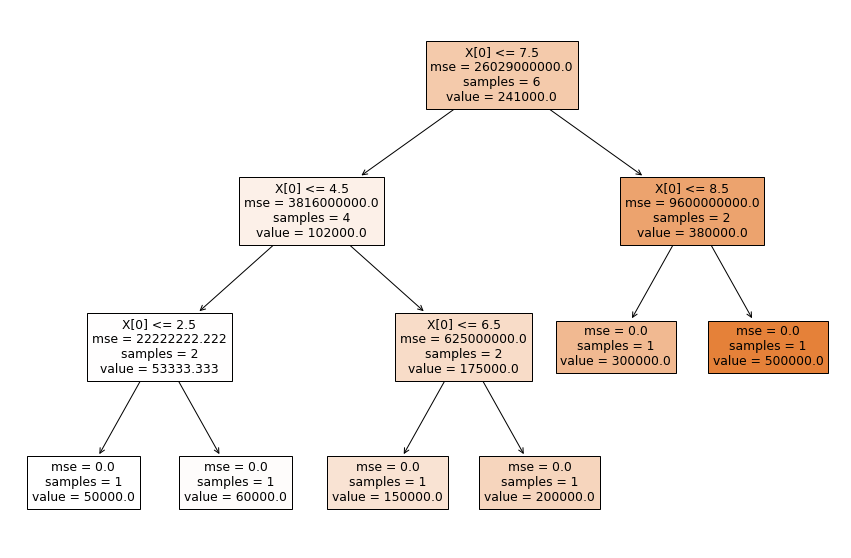

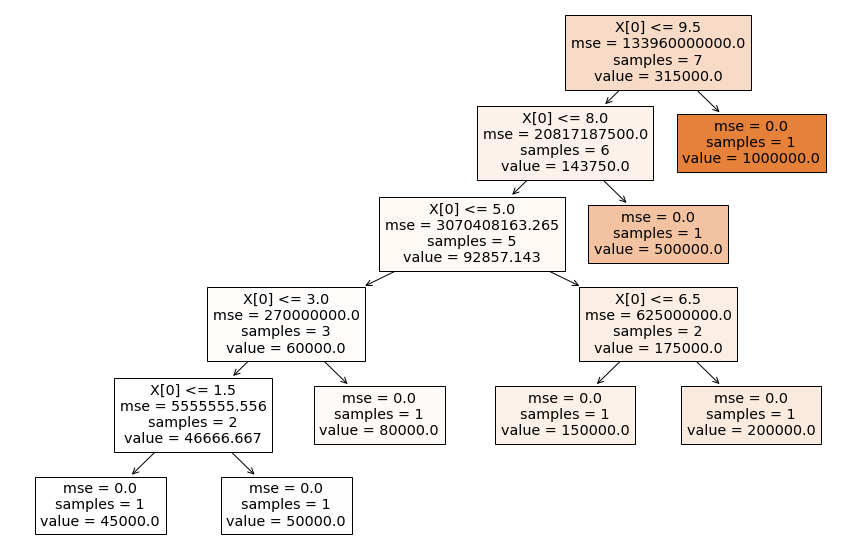

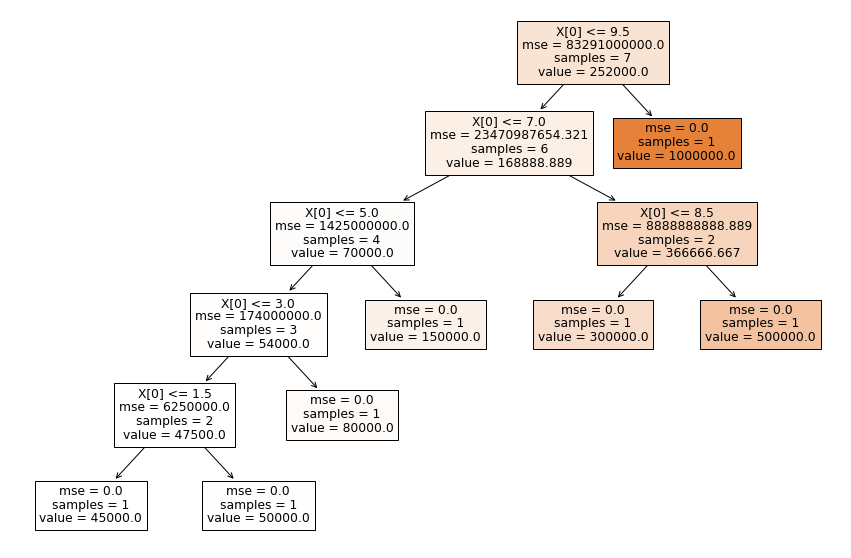

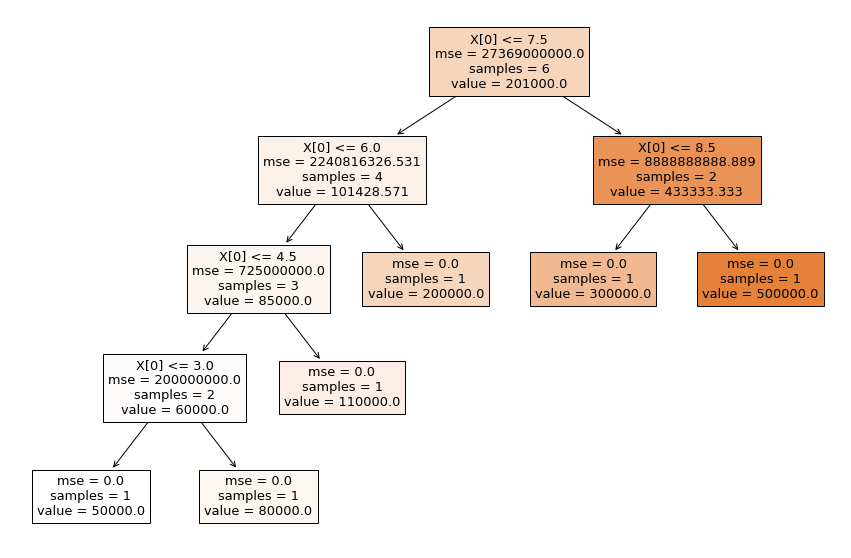

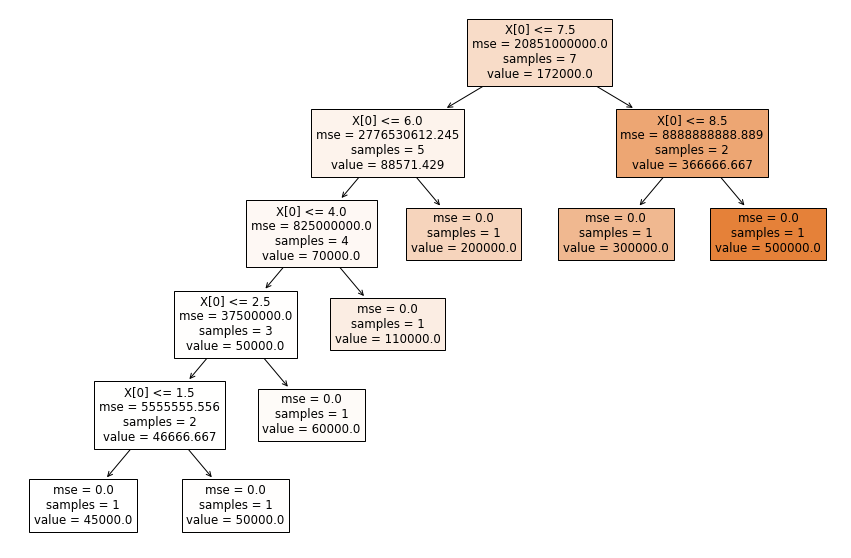

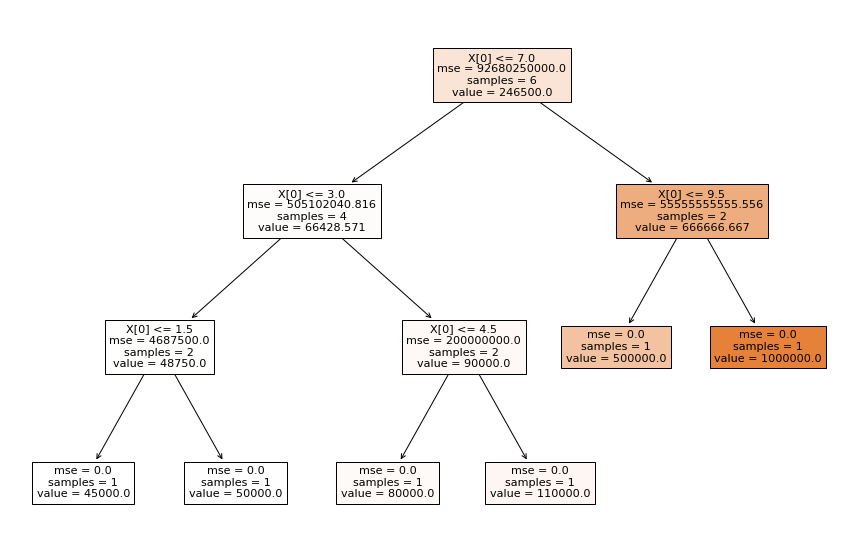

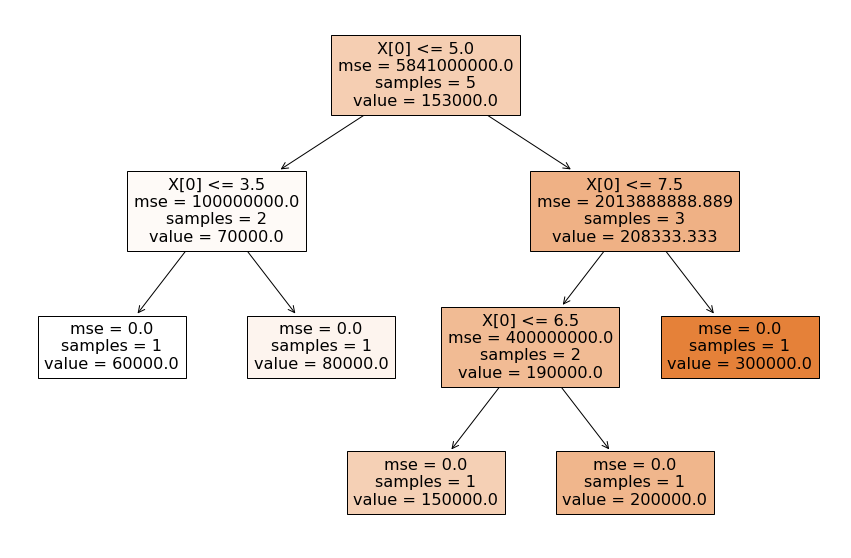

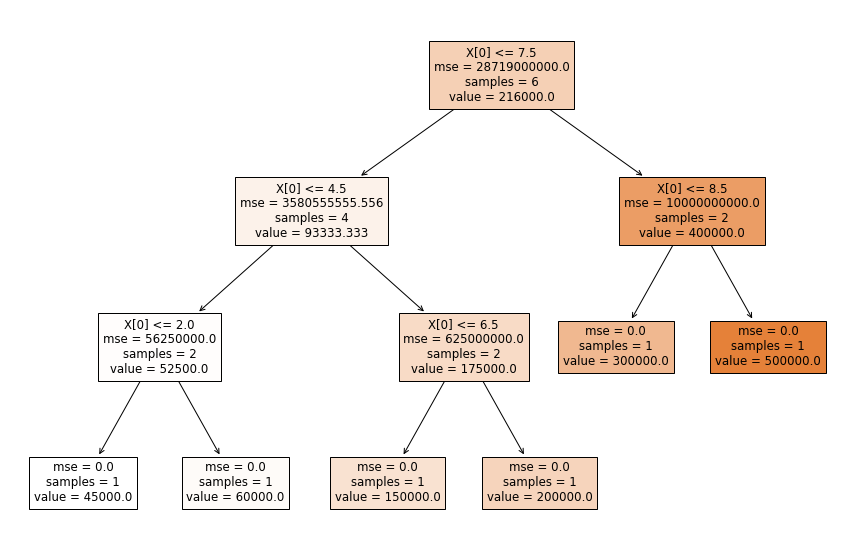

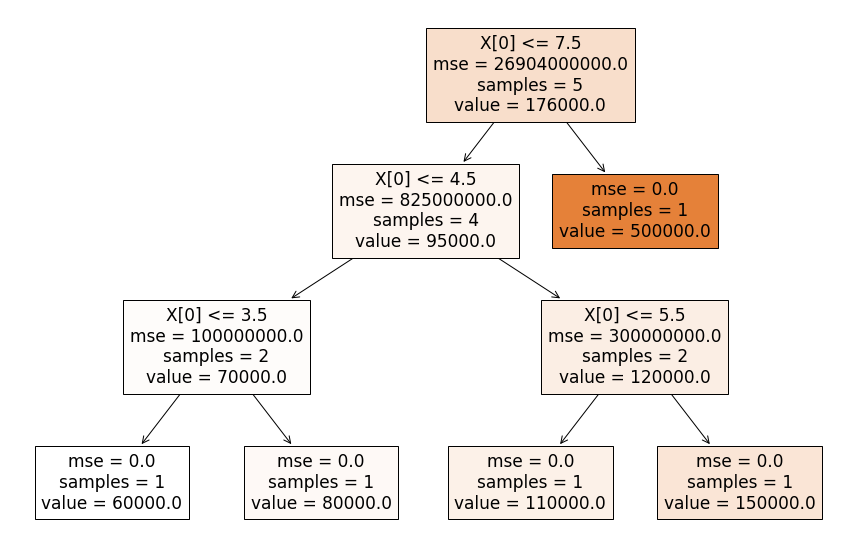

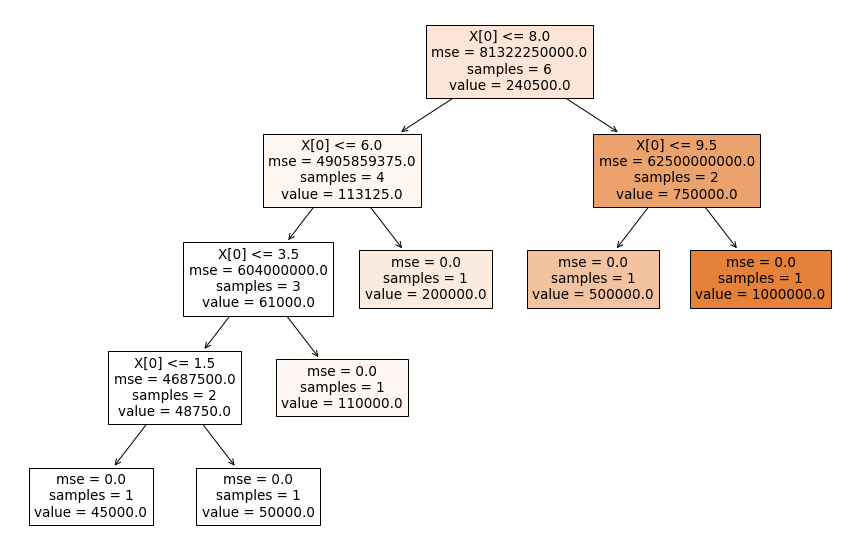

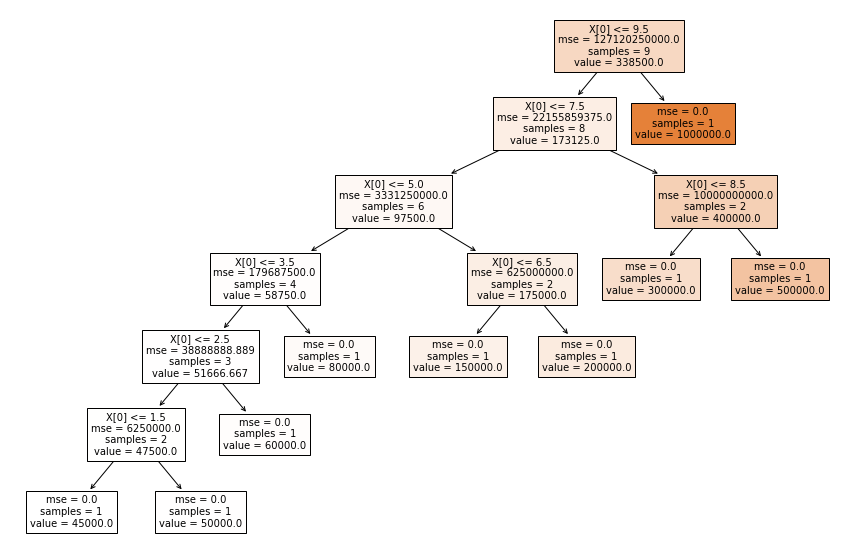

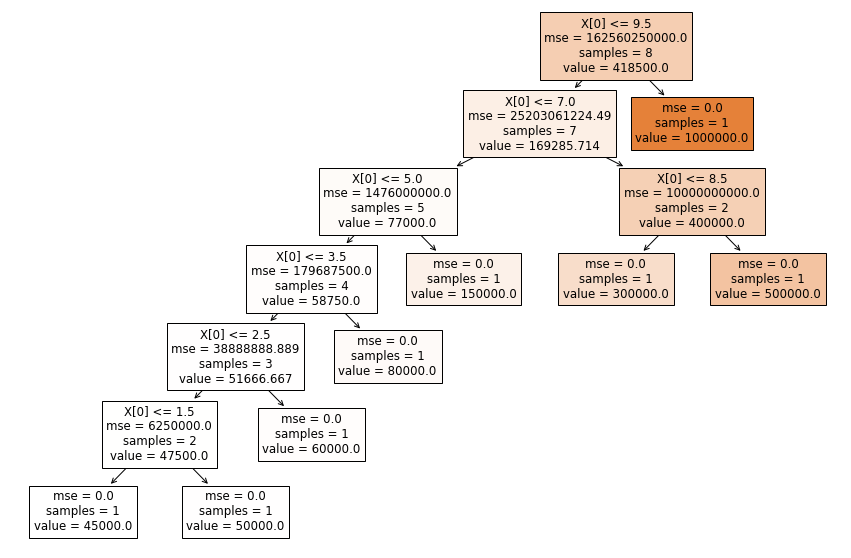

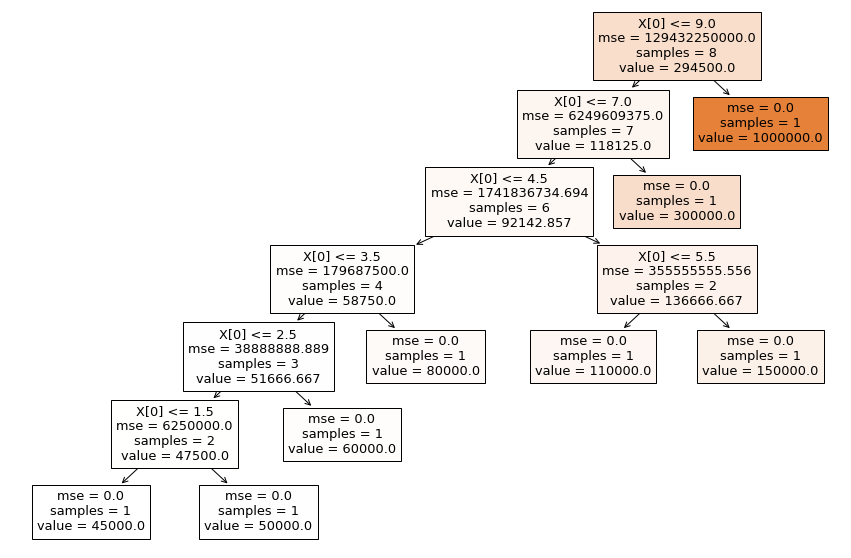

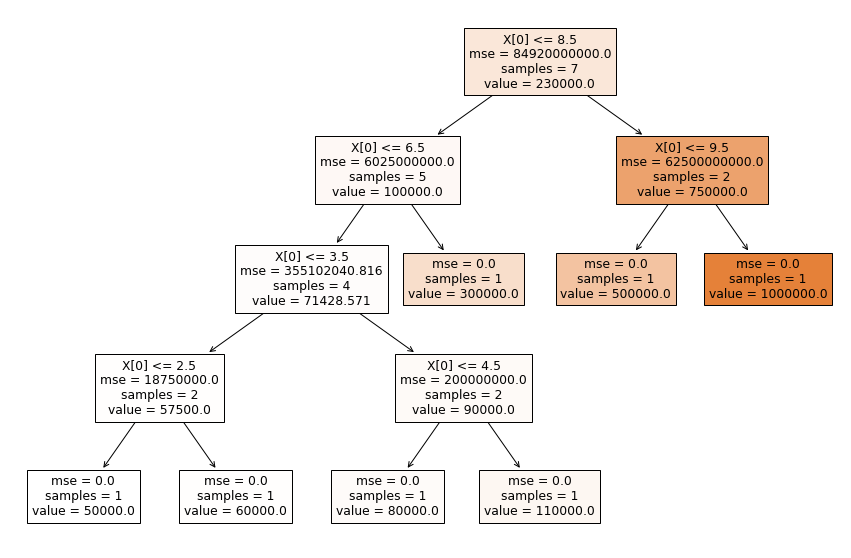

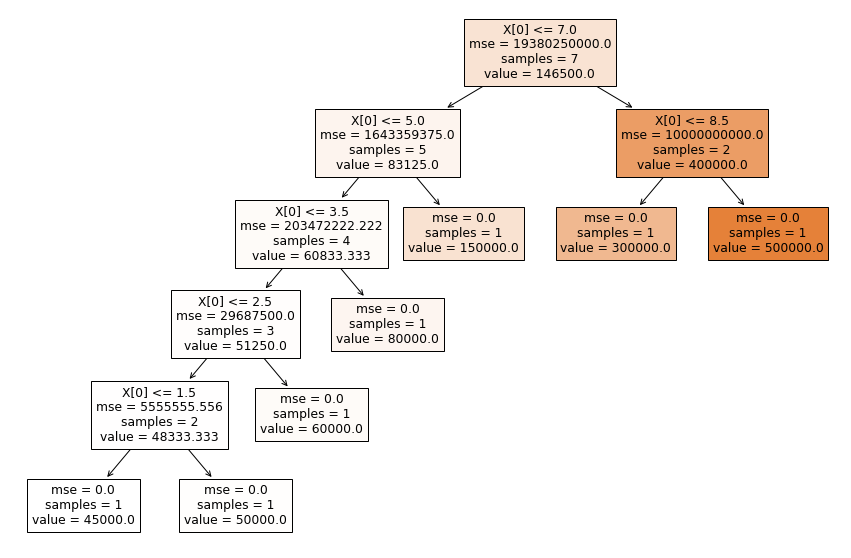

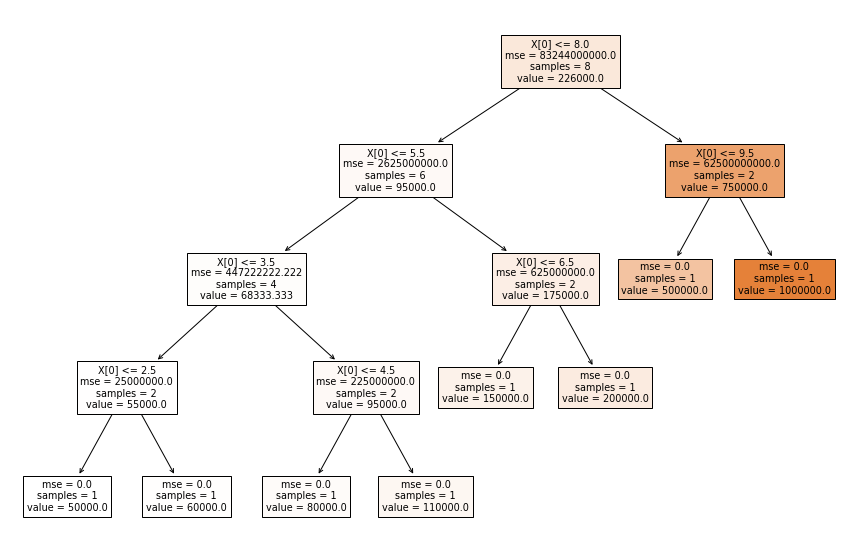

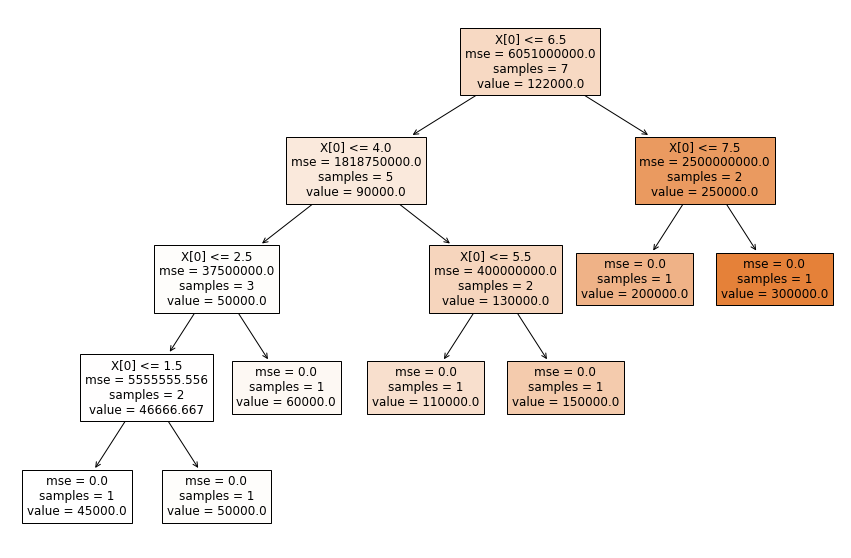

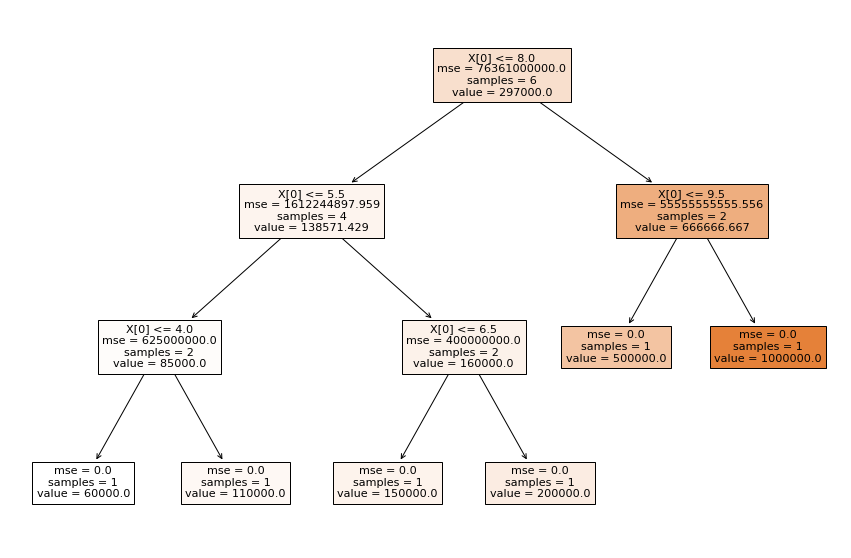

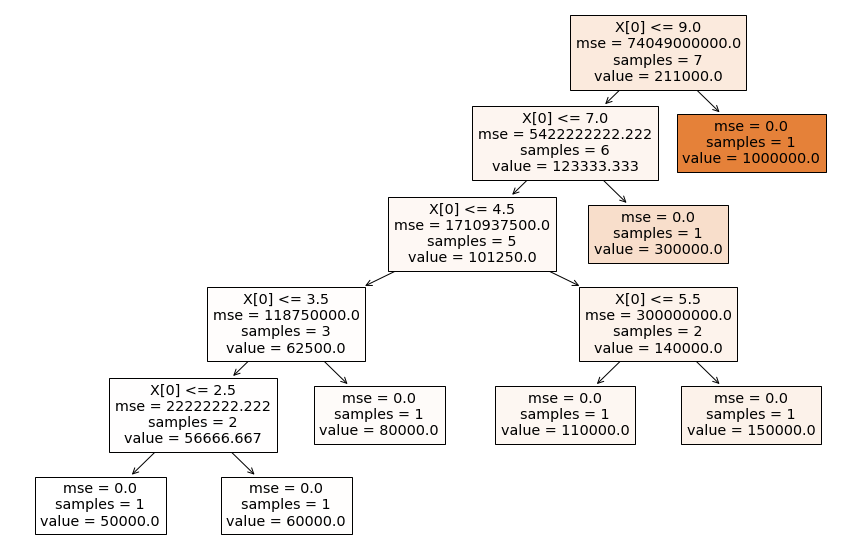

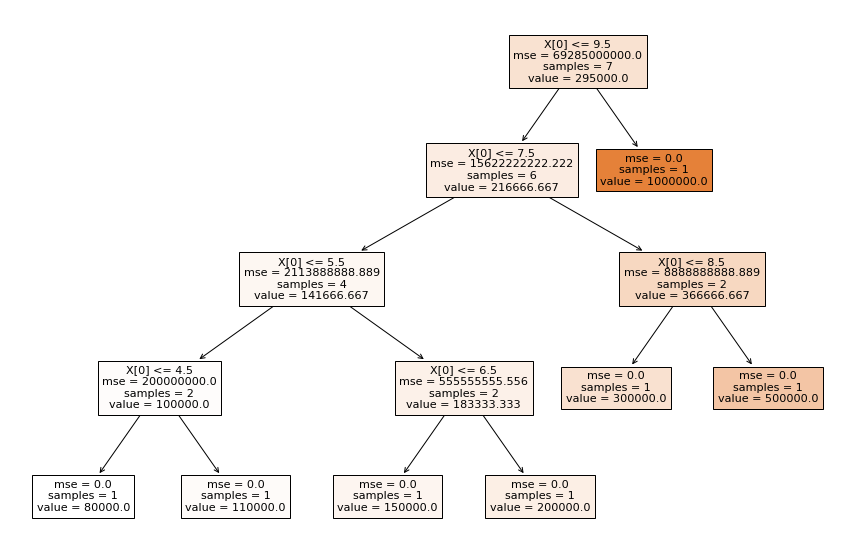

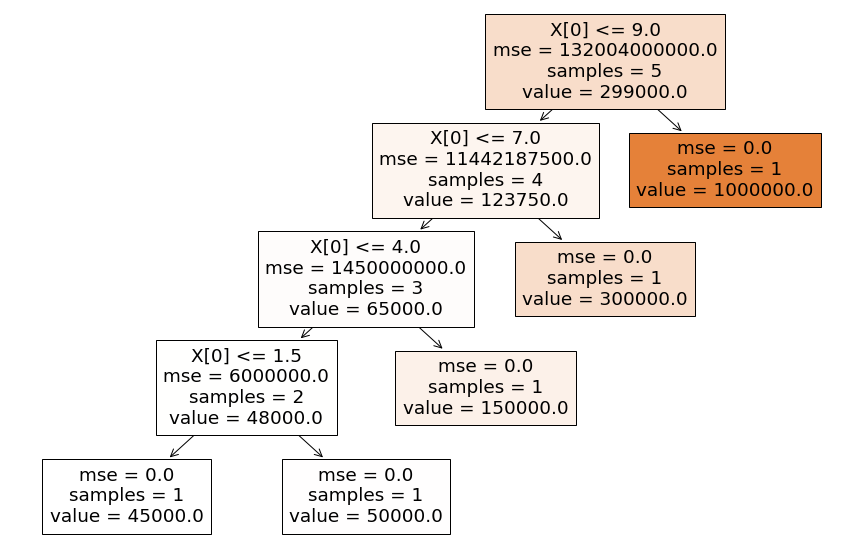

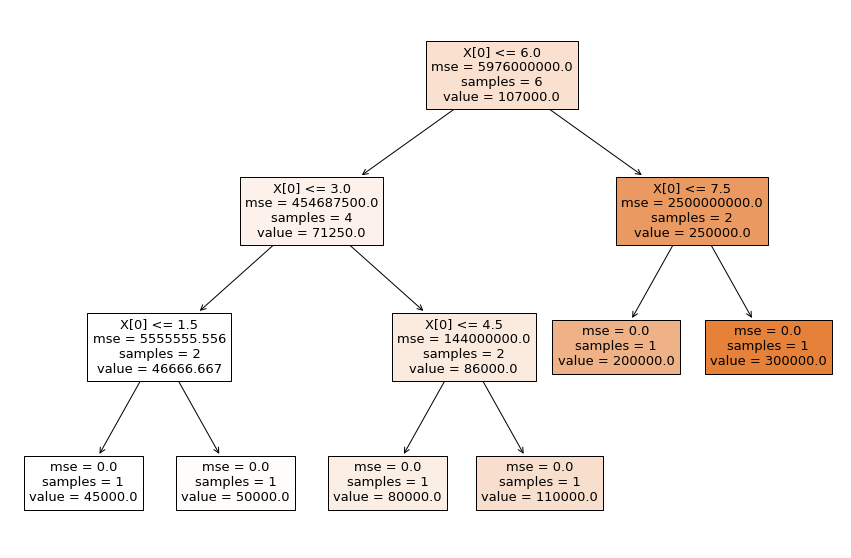

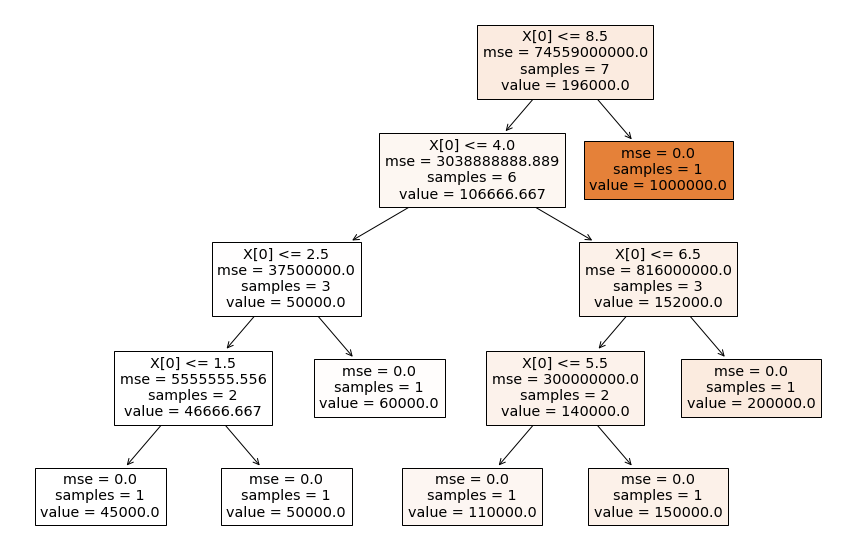

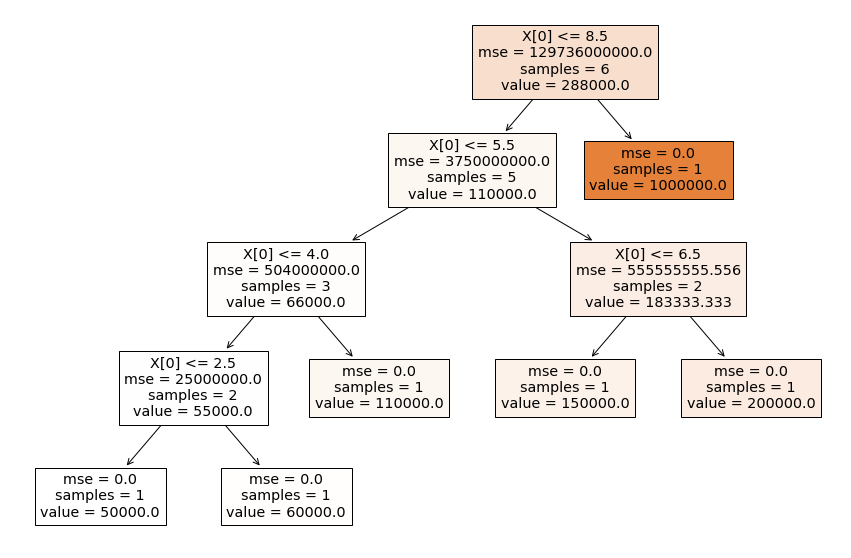

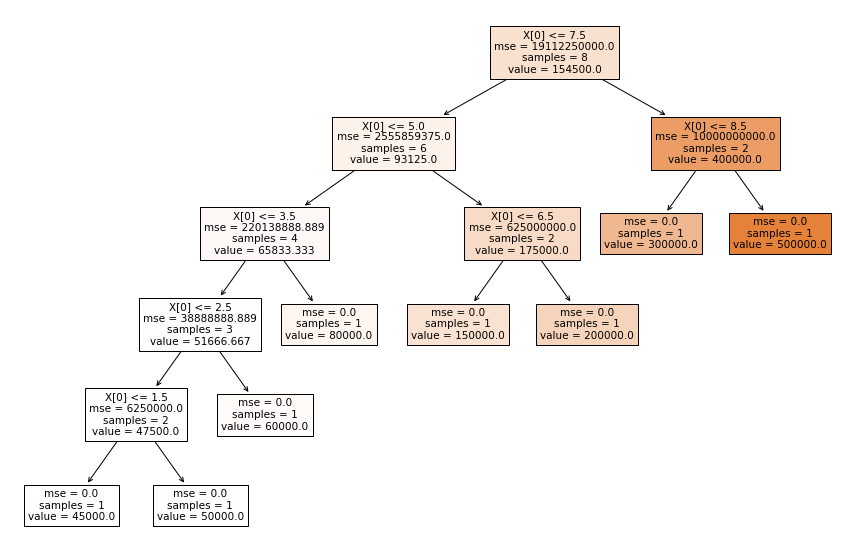

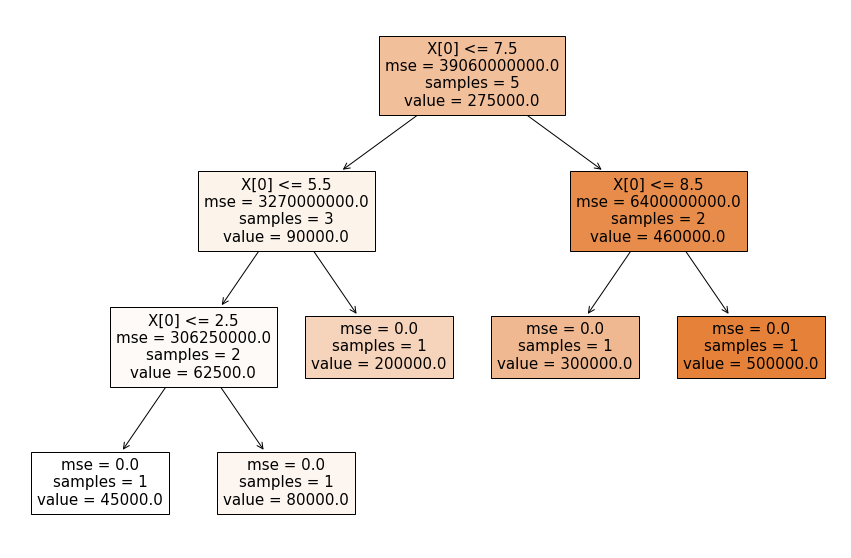

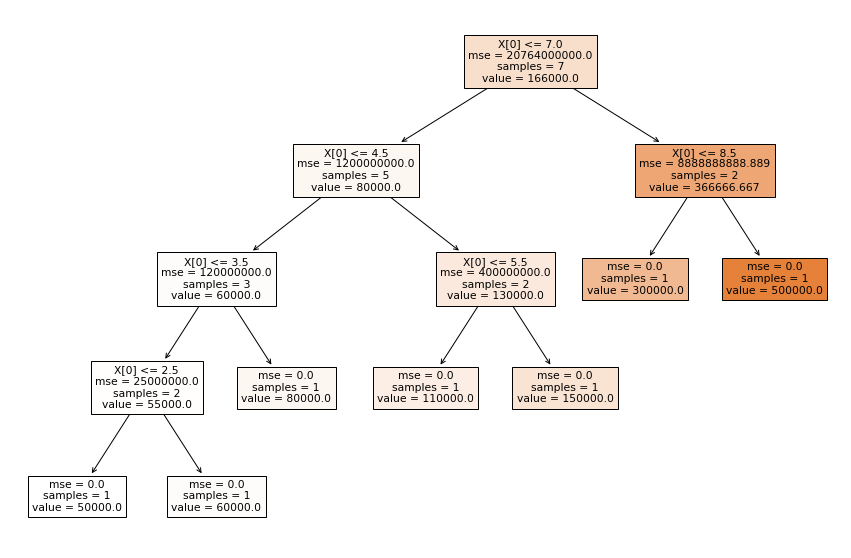

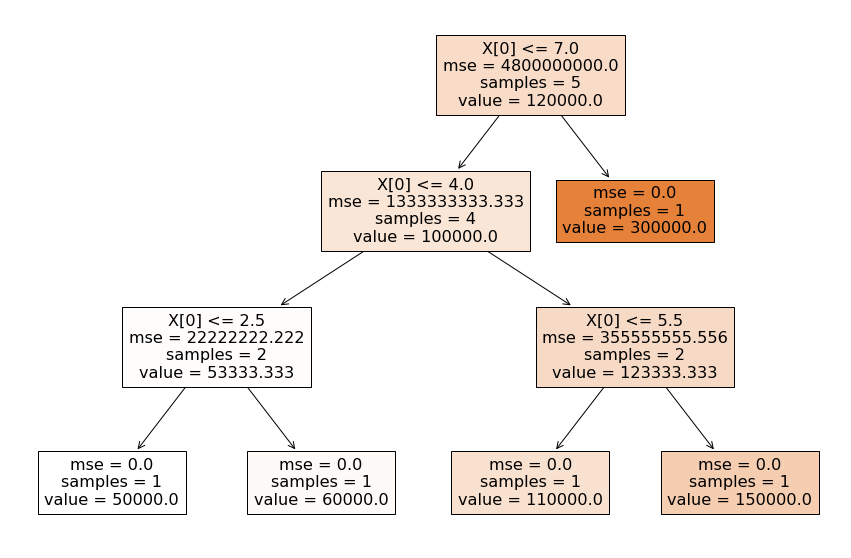

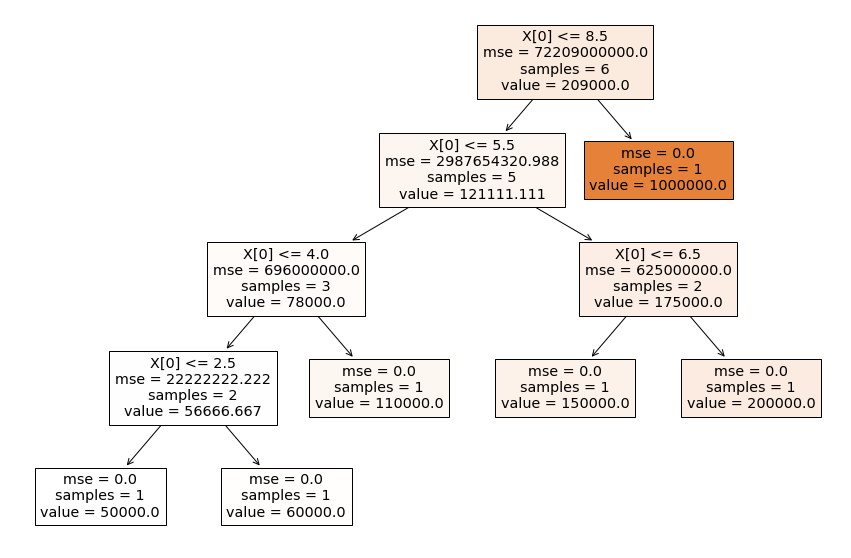

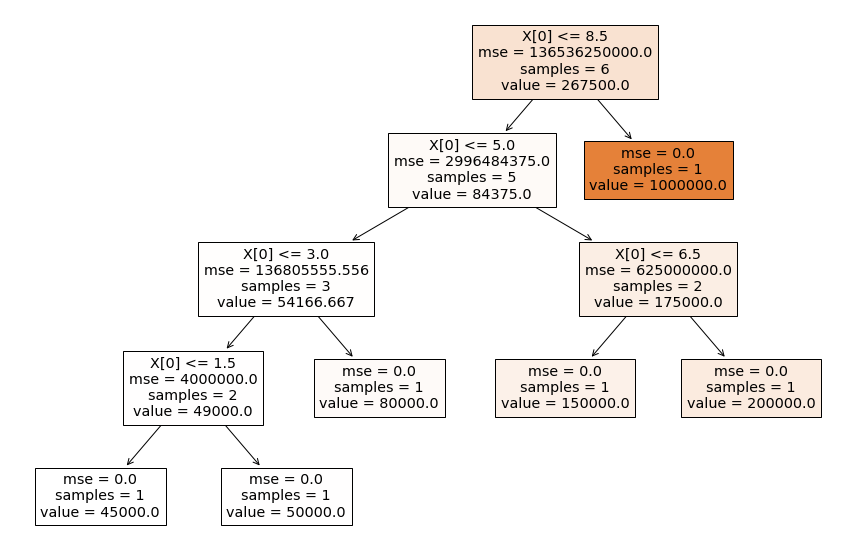

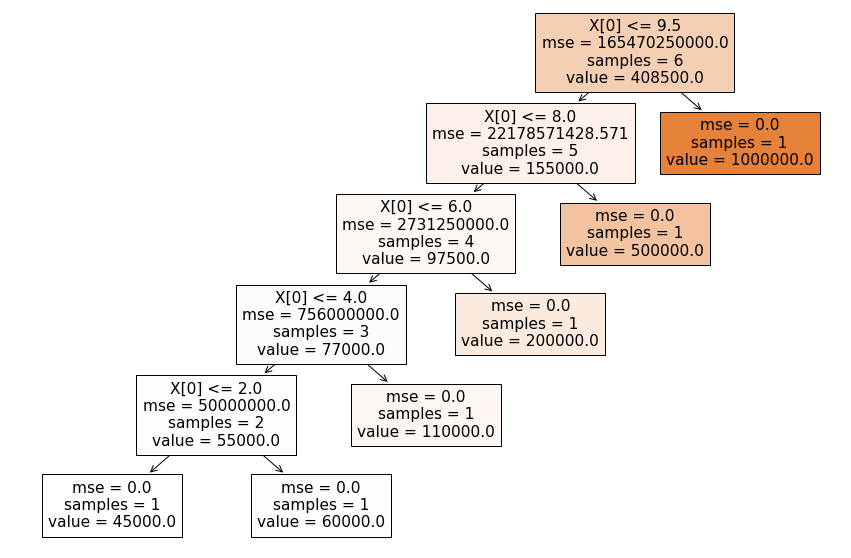

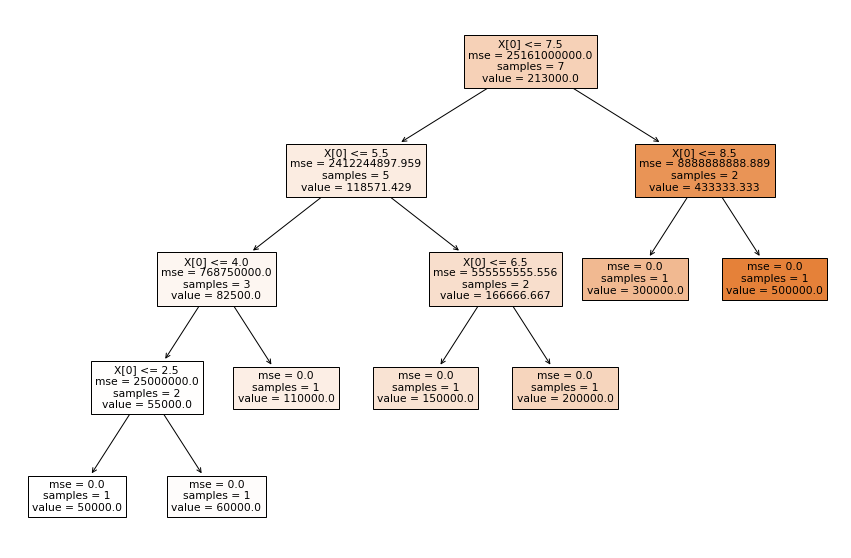

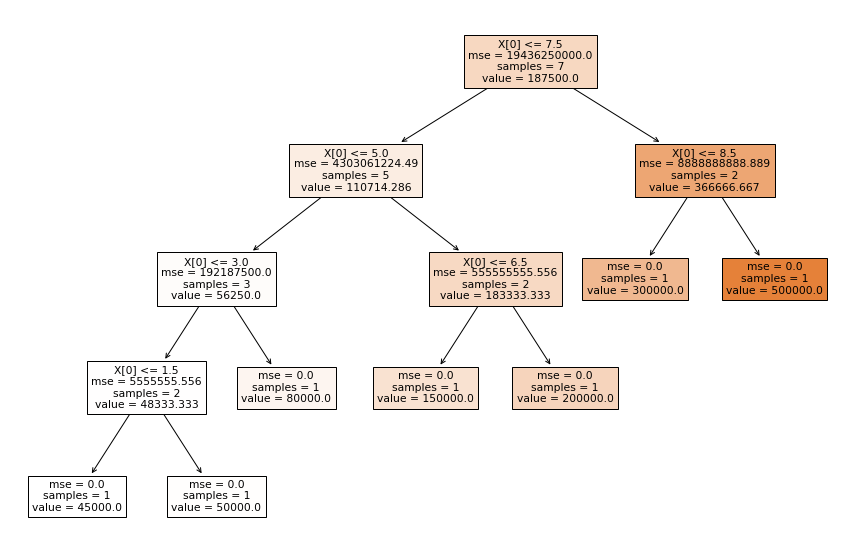

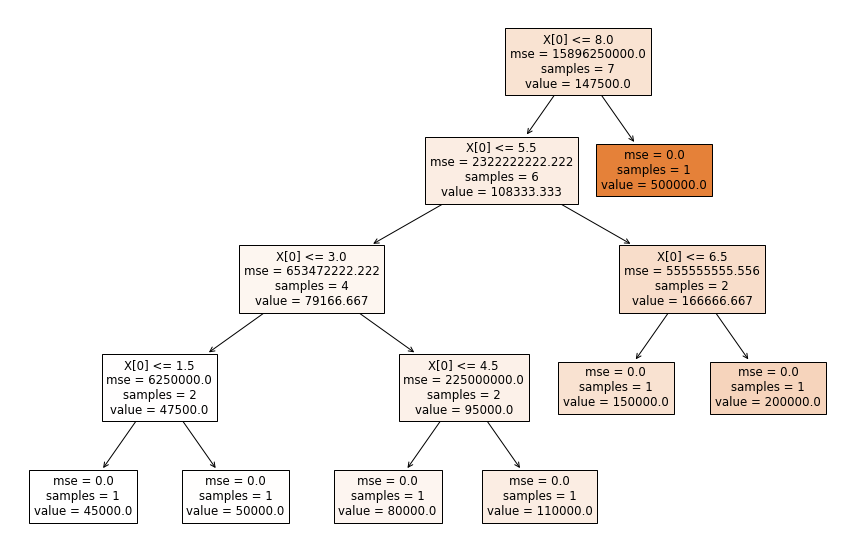

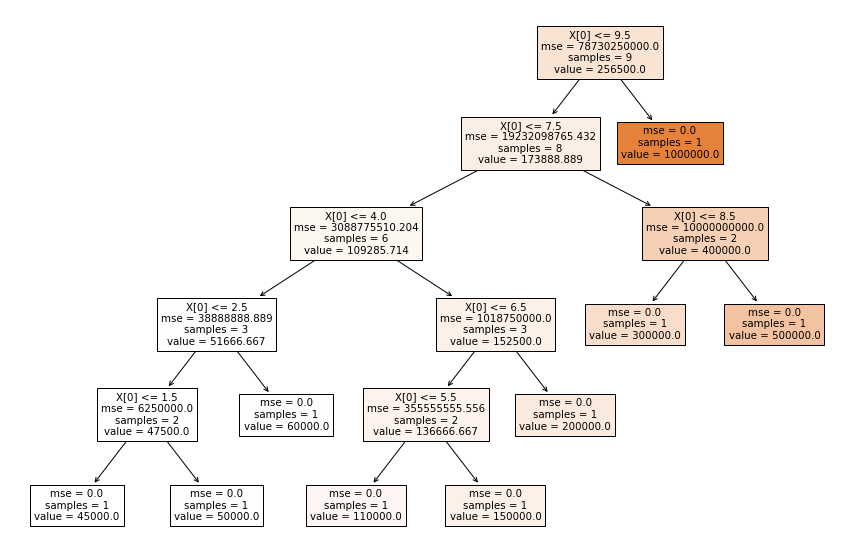

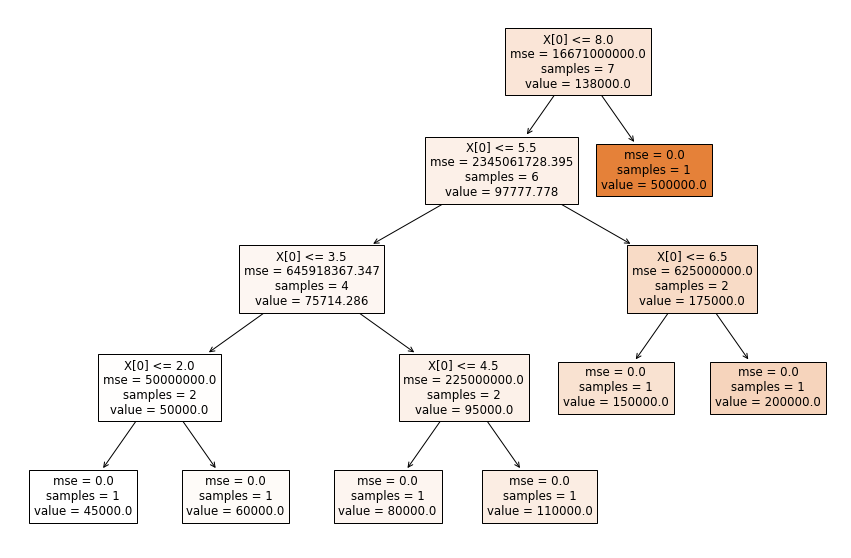

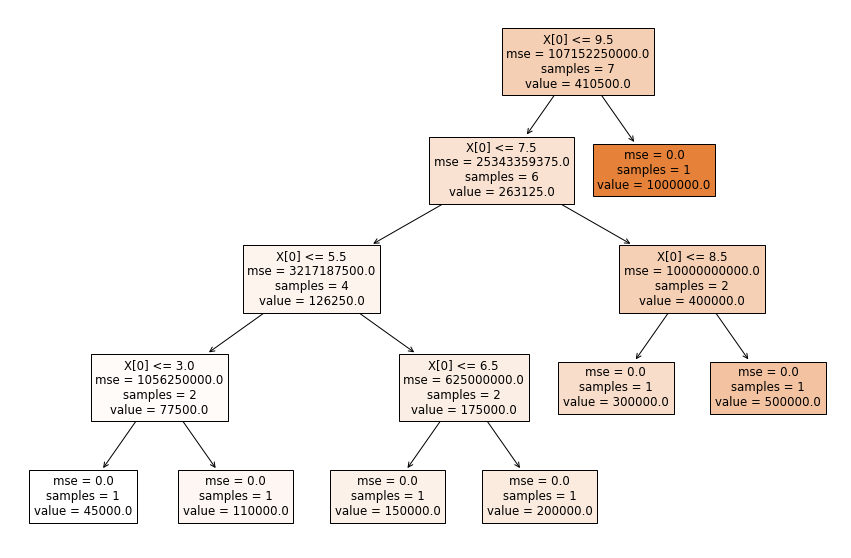

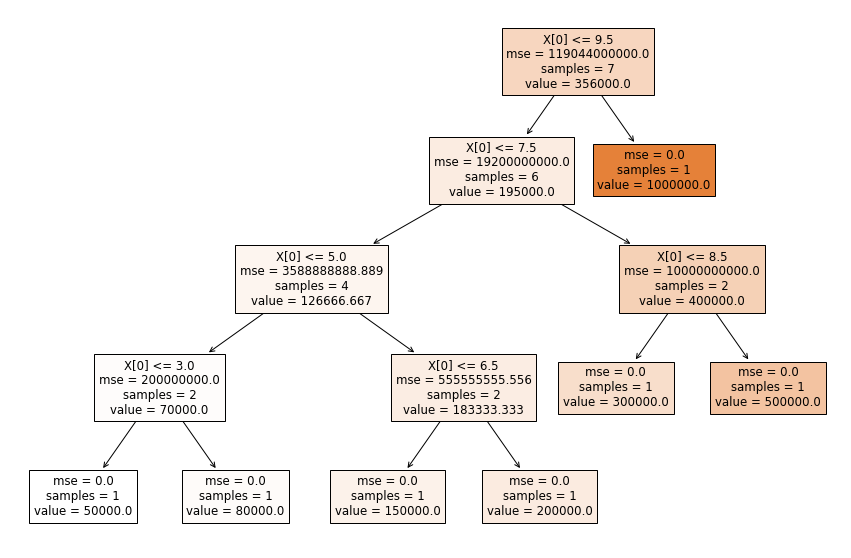

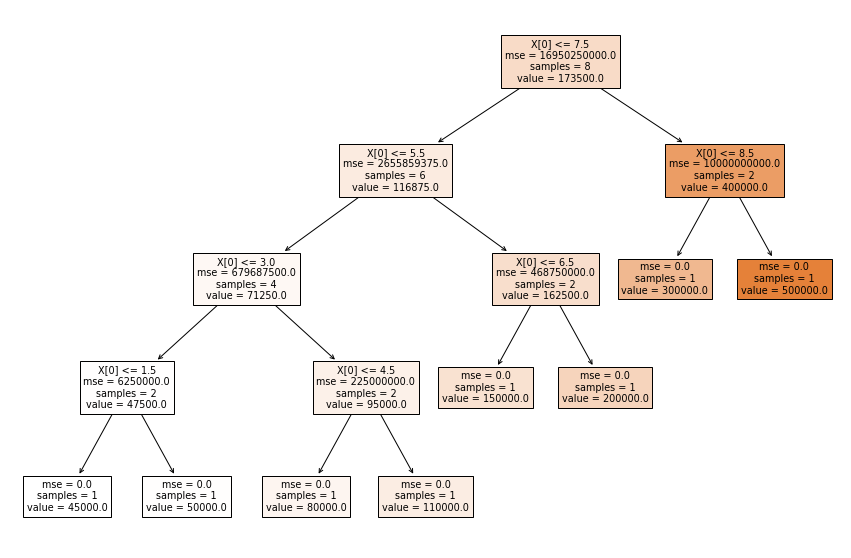

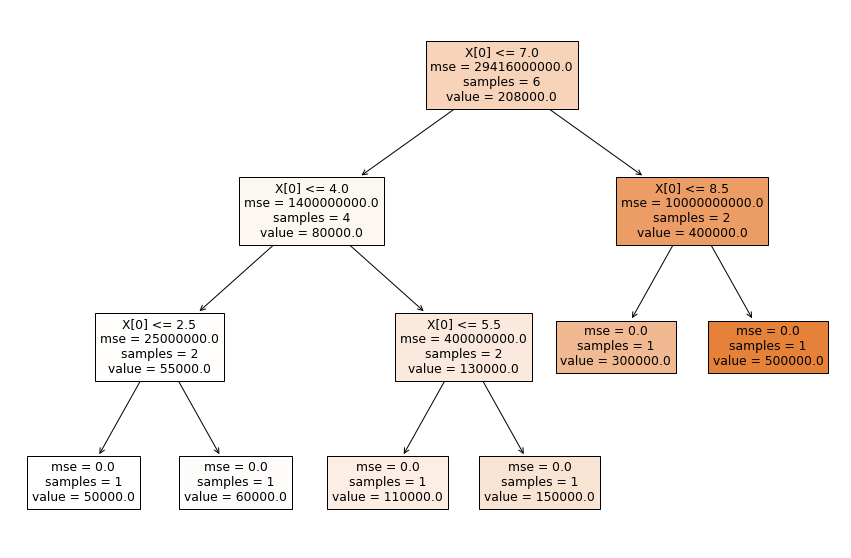

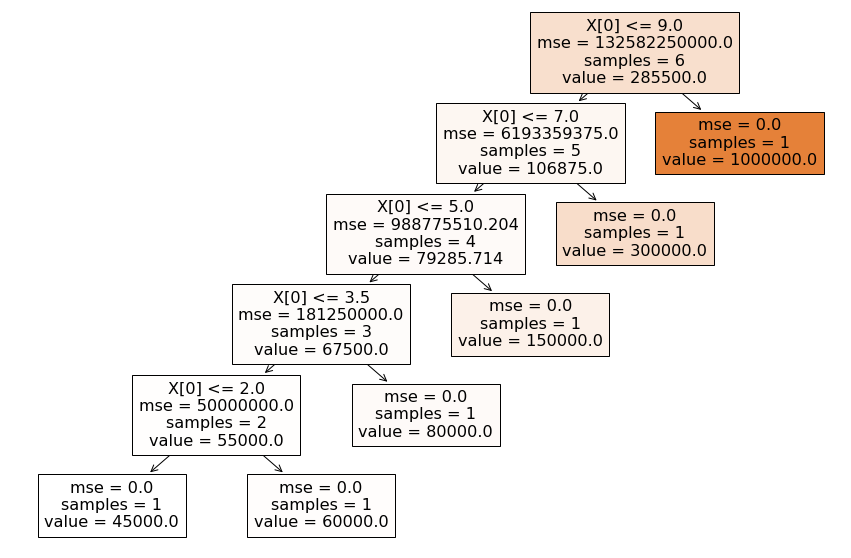

In [8]:
for i in range(0,100):
  plt.figure(figsize=(15,10))
  tree.plot_tree(modelRF.estimators_[i],filled=True)

## **Prediction**

In [9]:
y_pred = modelRF.predict([[6.5]])
y_pred

array([158300.])

## **Mean Squared Error**

In [10]:
from sklearn.metrics import mean_squared_error
import math

regression_model_mse = mean_squared_error(y_test,modelRF.predict(X_test))
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",modelRF.score(X,y))

Mean Squared Error:	 319833.74196604086
R squared value		 0.9378393331453065


## **Visualization**

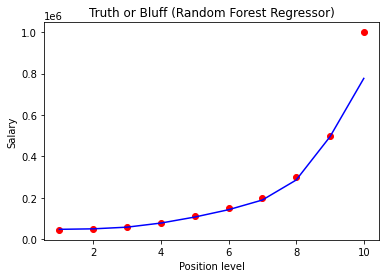

In [11]:
plt.scatter(X,y, color = 'red')
plt.plot(X, modelRF.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regressor)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()